## Operating Instructions

1. **Install Required Packages**  
   If any packages are not already installed on your local machine, use the following command to install them:
   
   ```bash
   pip install [packagename]

2. **Update File Paths**  
   Update the file paths in the code as needed to point to the correct locations on your system. Ensure that the paths to your data files, input files, and output directories are correct.

3. **Execution**  
   Most cells should be able to be run independently if a file path is provided at the beginning of the cell content. If you would like to operate this in Colab, please note that Drive outputs are currently enabled, so this would be more compatible in a Colab Environment



In [ ]:
import pandas as pd

print("Loading and filtering datasets...")

target_companies = ['KMB', 'KMB+CTB', 'LWB', 'LWB+CTB', 'CTB', 'NLB']

try:
    routes_data = pd.read_csv("C:\Users\jonch\COMP3522\submission\Feature_Engineering_Dependencies\final_with_districts.csv")
    print("Successfully loaded bus routes data")
    routes_data = routes_data[routes_data['COMPANY_CODE'].isin(target_companies)]
    print(f"Filtered to {len(routes_data)} rows from target companies")
except FileNotFoundError:
    print("Error: Could not load final_with_districts.csv")
    exit()

#check rows
print(f"Rows after filtering: {len(routes_data)}")


In [ ]:
import pandas as pd

print("Loading and filtering datasets...")

target_companies = ['KMB', 'KMB+CTB', 'LWB', 'LWB+CTB', 'CTB', 'NLB']

try:
    routes_data = pd.read_csv("C:\Users\jonch\COMP3522\submission\Feature_Engineering_Dependencies\final_with_districts.csv")
    print("Successfully loaded bus routes data")
    routes_data = routes_data[routes_data['COMPANY_CODE'].isin(target_companies)]
    print(f"Filtered to {len(routes_data)} rows from target companies")
except FileNotFoundError:
    print("Error: Could not load final_with_districts.csv")
    exit()

#check rows
print(f"Rows after filtering: {len(routes_data)}")


In [ ]:
### Add the Population Density ###

census_df = pd.read_csv(r"C:\Users\jonch\COMP3522\submission\Feature_Engineering_Dependencies\DC_21C.CSV")
census_df['District'] = census_df['District'].str.replace(' District', '').str.strip()
district_name_mapping = {
    'Central and Western': 'Central & Western',
    'Wan Chai': 'Wan Chai',
    'Eastern': 'Eastern',
    'Southern': 'Southern',
    'Yau Tsim Mong': 'Yau Tsim Mong',
    'Sham Shui Po': 'Sham Shui Po',
    'Kowloon City': 'Kowloon City',
    'Wong Tai Sin': 'Wong Tai Sin',
    'Kwun Tong': 'Kwun Tong',
    'Kwai Tsing': 'Kwai Tsing',
    'Tsuen Wan': 'Tsuen Wan',
    'Tuen Mun': 'Tuen Mun',
    'Yuen Long': 'Yuen Long',
    'North': 'North',
    'Tai Po': 'Tai Po',
    'Sha Tin': 'Sha Tin',
    'Sai Kung': 'Sai Kung',
    'Islands': 'Islands'
}
census_df['District'] = census_df['District'].replace(district_name_mapping)

# District areas (in square km)
district_areas = {
    'Central & Western': 12.55,
    'Wan Chai': 10.64,
    'Eastern': 18.13,
    'Southern': 39.40,
    'Yau Tsim Mong': 6.99,
    'Sham Shui Po': 9.36,
    'Kowloon City': 10.02,
    'Wong Tai Sin': 9.30,
    'Kwun Tong': 11.28,
    'Kwai Tsing': 23.34,
    'Tsuen Wan': 62.62,
    'Tuen Mun': 87.54,
    'Yuen Long': 138.56,
    'North': 136.51,
    'Tai Po': 148.19,
    'Sha Tin': 69.27,
    'Sai Kung': 136.34,
    'Islands': 182.74
}


census_df['District'] = census_df['District'].str.replace(' District', '').str.strip()

census_df['District'] = census_df['District'].replace(district_name_mapping)

census_df['Area_sqkm'] = census_df['District'].map(district_areas)

#calculate pop density
census_df['Population_Density'] = census_df['Total population'] / census_df['Area_sqkm']

#merge with routes_data 
district_stats_start = census_df[['District', 'Population_Density']].rename(columns={'District': 'START_DISTRICT', 'Population_Density': 'START_Population_Density'})
routes_data = pd.merge(routes_data, district_stats_start, on='START_DISTRICT', how='left')

# merge for the end district population density
district_stats_end = census_df[['District', 'Population_Density']].rename(columns={'District': 'END_DISTRICT', 'Population_Density': 'END_Population_Density'})
routes_data = pd.merge(routes_data, district_stats_end, on='END_DISTRICT', how='left')

print(routes_data[['START_DISTRICT', 'END_DISTRICT', 'START_Population_Density', 'END_Population_Density']].head())


In [ ]:
cols_to_drop = [col for col in routes_data.columns if 'Inflow' in col or 'Outflow' in col]
if cols_to_drop:
    routes_data = routes_data.drop(columns=cols_to_drop)

# Calculate inflow and outflow 
inflow = od_long.groupby("Destination_District")["Commuters"].sum().reset_index()
inflow.columns = ["District", "Inflow"]

outflow = od_long.groupby("Origin_District")["Commuters"].sum().reset_index()
outflow.columns = ["District", "Outflow"]

start_inflow = inflow.copy()
start_inflow.columns = ["START_DISTRICT", "START_Inflow"]

start_outflow = outflow.copy()
start_outflow.columns = ["START_DISTRICT", "START_Outflow"]

end_inflow = inflow.copy()
end_inflow.columns = ["END_DISTRICT", "END_Inflow"]

end_outflow = outflow.copy()
end_outflow.columns = ["END_DISTRICT", "END_Outflow"]

# merge one by one 
routes_data = pd.merge(routes_data, start_inflow, on="START_DISTRICT", how="left")
routes_data = pd.merge(routes_data, start_outflow, on="START_DISTRICT", how="left")
routes_data = pd.merge(routes_data, end_inflow, on="END_DISTRICT", how="left")
routes_data = pd.merge(routes_data, end_outflow, on="END_DISTRICT", how="left")

print(routes_data[['START_DISTRICT', 'END_DISTRICT', 'START_Inflow', 'START_Outflow', 'END_Inflow', 'END_Outflow']].head())

In [ ]:
## Flow Ratio + Net Flow ##

routes_data['FLOW_RATIO'] = routes_data['START_Outflow'] / routes_data['END_Outflow']

# Create NET_FLOW column - net flow (start - end)
routes_data['NET_FLOW'] = routes_data['START_Outflow'] - routes_data['END_Outflow']

different_districts = routes_data[routes_data['START_DISTRICT'] != routes_data['END_DISTRICT']]

if len(different_districts) > 0:
    print(f"Found {len(different_districts)} routes with different start and end districts.")
    print("\nHere are 10 examples with FLOW_RATIO and NET_FLOW:")

    display_cols = ['START_DISTRICT', 'END_DISTRICT', 'START_Outflow',
                   'END_Outflow', 'FLOW_RATIO', 'NET_FLOW']
    print(different_districts[display_cols].head(10))

    print(routes_data[display_cols].head(10))


In [ ]:
### Income Diff and Population Density Diff ###

#calculate the target vars
routes_data['INCOME_DIFF'] = routes_data['START_MonthlyMedianIncome'] - routes_data['END_MonthlyMedianIncome']
routes_data['DENSITY_DIFF'] = routes_data['START_Population_Density'] - routes_data['END_Population_Density']

# Display examples of the new metrics
print("\nExample routes with income and density differences:")
display_cols = ['START_DISTRICT', 'END_DISTRICT',
                'START_MonthlyMedianIncome', 'END_MonthlyMedianIncome', 'INCOME_DIFF',
                'START_Population_Density', 'END_Population_Density', 'DENSITY_DIFF']

# Find routes between different districts
different_districts = routes_data[routes_data['START_DISTRICT'] != routes_data['END_DISTRICT']]
print(different_districts[display_cols].head(10))

In [ ]:
#Bus Station Density

if 'START_STOP_ID' in routes_data.columns and 'END_STOP_ID' in routes_data.columns:
    unique_start_stops = routes_data[['START_DISTRICT', 'START_STOP_ID']].drop_duplicates()
    unique_end_stops = routes_data[['END_DISTRICT', 'END_STOP_ID']].drop_duplicates()
else:
    unique_start_stops = routes_data[['START_DISTRICT']].drop_duplicates()
    unique_end_stops = routes_data[['END_DISTRICT']].drop_duplicates()

# count unique bus stops per district
start_stop_counts = unique_start_stops['START_DISTRICT'].value_counts().reset_index()
start_stop_counts.columns = ['District', 'Bus_Stop_Count']

end_stop_counts = unique_end_stops['END_DISTRICT'].value_counts().reset_index()
end_stop_counts.columns = ['District', 'Bus_Stop_Count']

# combine counts
if 'START_STOP_ID' in routes_data.columns and 'END_STOP_ID' in routes_data.columns:
    all_stops = pd.concat([
        unique_start_stops.rename(columns={'START_DISTRICT': 'District', 'START_STOP_ID': 'STOP_ID'}),
        unique_end_stops.rename(columns={'END_DISTRICT': 'District', 'END_STOP_ID': 'STOP_ID'})
    ]).drop_duplicates()
else:
    all_stops = pd.concat([
        unique_start_stops.rename(columns={'START_DISTRICT': 'District'}),
        unique_end_stops.rename(columns={'END_DISTRICT': 'District'})
    ]).drop_duplicates()

bus_stop_counts = all_stops['District'].value_counts().reset_index()
bus_stop_counts.columns = ['District', 'Bus_Stop_Count']

district_df = pd.DataFrame({
    'District': list(district_areas.keys()),
    'Area_sqkm': list(district_areas.values())
})

#merge bus stop counts with district areas
district_stats = district_df.merge(bus_stop_counts, on='District', how='left')
district_stats['Bus_Station_Density'] = district_stats['Bus_Stop_Count'] / district_stats['Area_sqkm']

start_bus_density = district_stats[['District', 'Bus_Station_Density']].rename(
    columns={'District': 'START_DISTRICT', 'Bus_Station_Density': 'START_Bus_Station_Density'})

end_bus_density = district_stats[['District', 'Bus_Station_Density']].rename(
    columns={'District': 'END_DISTRICT', 'Bus_Station_Density': 'END_Bus_Station_Density'})

# merge with routes_data
routes_data = pd.merge(routes_data, start_bus_density, on='START_DISTRICT', how='left')
routes_data = pd.merge(routes_data, end_bus_density, on='END_DISTRICT', how='left')

#calculate BUS_DENSITY_DIFF
routes_data['BUS_DENSITY_DIFF'] = routes_data['START_Bus_Station_Density'] - routes_data['END_Bus_Station_Density']


In [ ]:
# One-hot encode the 'COMPANY_CODE', 'START_DISTRICT', and 'END_DISTRICT' columns
routes_data_encoded = pd.get_dummies(routes_data, columns=['COMPANY_CODE', 'START_DISTRICT', 'END_DISTRICT'])

# Display the first few rows of the encoded dataset
print(routes_data_encoded.head())

# Check the number of rows before one-hot encoding
print(f"Original rows: {len(routes_data)}")

# Check the number of rows after one-hot encoding
print(f"Rows after encoding: {len(routes_data_encoded)}")


In [ ]:
import osmnx as ox
import networkx as nx
import pandas as pd
import numpy as np
from geopy.distance import geodesic
from multiprocessing import Pool

# Load the Road Network Graph for Hong Kong using OSMnx
place_name = "Hong Kong"
G = ox.graph_from_place(place_name, network_type='drive')

# Function to Get Nearest Node from Latitude/Longitude
def get_nearest_node(lat, lon, G):
    return ox.nearest_nodes(G, lon, lat)

# Function to Get Road Distance Using OSMnx (this is a helper for later)
def get_osmnx_distance(orig_node, dest_node, G):
    try:
        # Calculate shortest path length (in meters)
        length = nx.shortest_path_length(G, orig_node, dest_node, weight='length')
        return length / 1000  # Convert to kilometers
    except (nx.NetworkXNoPath, nx.NodeNotFound, ValueError) as e:
        print(f"Error calculating distance: {e}")
        return np.nan  # Return NaN if distance calculation fails

# Function to process a row and get the road distance
def process_row(row):
    orig_node = get_nearest_node(row['ON_Lat'], row['ON_Long'], G)
    dest_node = get_nearest_node(row['OFF_Lat'], row['OFF_Long'], G)
    return get_osmnx_distance(orig_node, dest_node, G)

# 1. Load the dataset and filter by specific bus companies
target_companies = ['KMB', 'KMB+CTB', 'LWB', 'LWB+CTB', 'CTB', 'NLB']
routes_data = pd.read_csv("C:\Users\jonch\COMP3522\submission\Feature_Engineering_Dependencies\final_with_districts.csv")
routes_data = routes_data[routes_data['COMPANY_CODE'].isin(target_companies)]

# 2. Extract Latitude and Longitude from ON_Location and OFF_Location
routes_data[['ON_Lat', 'ON_Long']] = routes_data['ON_Location'].str.extract(r'([\d.]+),\s*([\d.]+)').astype(float)
routes_data[['OFF_Lat', 'OFF_Long']] = routes_data['OFF_Location'].str.extract(r'([\d.]+),\s*([\d.]+)').astype(float)

# Drop rows with missing values in coordinates
routes_data.dropna(subset=['ON_Lat', 'ON_Long', 'OFF_Lat', 'OFF_Long'], inplace=True)

# 3. Pre-calculate nearest nodes for both ON and OFF locations
routes_data['orig_node'] = routes_data.apply(lambda row: get_nearest_node(row['ON_Lat'], row['ON_Long'], G), axis=1)
routes_data['dest_node'] = routes_data.apply(lambda row: get_nearest_node(row['OFF_Lat'], row['OFF_Long'], G), axis=1)

# 4. Use multiprocessing to calculate the distance efficiently in parallel
with Pool() as pool:
    distances = pool.map(process_row, [row for index, row in routes_data.iterrows()])

# 5. Add the calculated distances as a new column to the original dataframe
routes_data['DISTANCE_KM'] = distances

# One-hot encode the 'COMPANY_CODE', 'START_DISTRICT', and 'END_DISTRICT' columns
routes_data_encoded = pd.get_dummies(routes_data, columns=['COMPANY_CODE', 'START_DISTRICT', 'END_DISTRICT'])

# Display the first few rows of the encoded dataset
print(routes_data_encoded.head())

# Check the number of rows before one-hot encoding
print(f"Original rows: {len(routes_data)}")

# Check the number of rows after one-hot encoding
print(f"Rows after encoding: {len(routes_data_encoded)}")


In [ ]:
# one-hot encode COMPANY_CODE START_DISTRICT and END_DISTRICT
routes_data_encoded = pd.get_dummies(routes_data, columns=['COMPANY_CODE', 'START_DISTRICT', 'END_DISTRICT'])


In [ ]:
# one-hot encode COMPANY_CODE START_DISTRICT and END_DISTRICT
routes_data_encoded = pd.get_dummies(routes_data, columns=['COMPANY_CODE', 'START_DISTRICT', 'END_DISTRICT'])


In [ ]:
### ADDING IS_CBD Feature ###

# CBD districts
cbd_districts = ['Central & Western', 'Wan Chai', 'Admiralty']  # Add more CBD areas if needed

routes_data_encoded['END_IN_CBD'] = False

#check for CBD in col
for cbd in cbd_districts:
    cbd_column = f"END_DISTRICT_{cbd}"
    if cbd_column in routes_data_encoded.columns:
        routes_data_encoded['END_IN_CBD'] = routes_data_encoded['END_IN_CBD'] | routes_data_encoded[cbd_column]

routes_data_encoded['END_IN_CBD'] = routes_data_encoded['END_IN_CBD'].fillna(False).astype(bool)

print(routes_data_encoded[['ROUTE_ID', 'ON_STOP_NAMEE', 'OFF_STOP_NAMEE', 'END_IN_CBD']].head())

# Save the final dataset with the new feature
routes_data_encoded.to_csv("/content/Model_data.csv", index=False)

print(f"Final dataset with CBD feature has been saved to '/content/Model_data.csv'")


### Random Forest Model ###

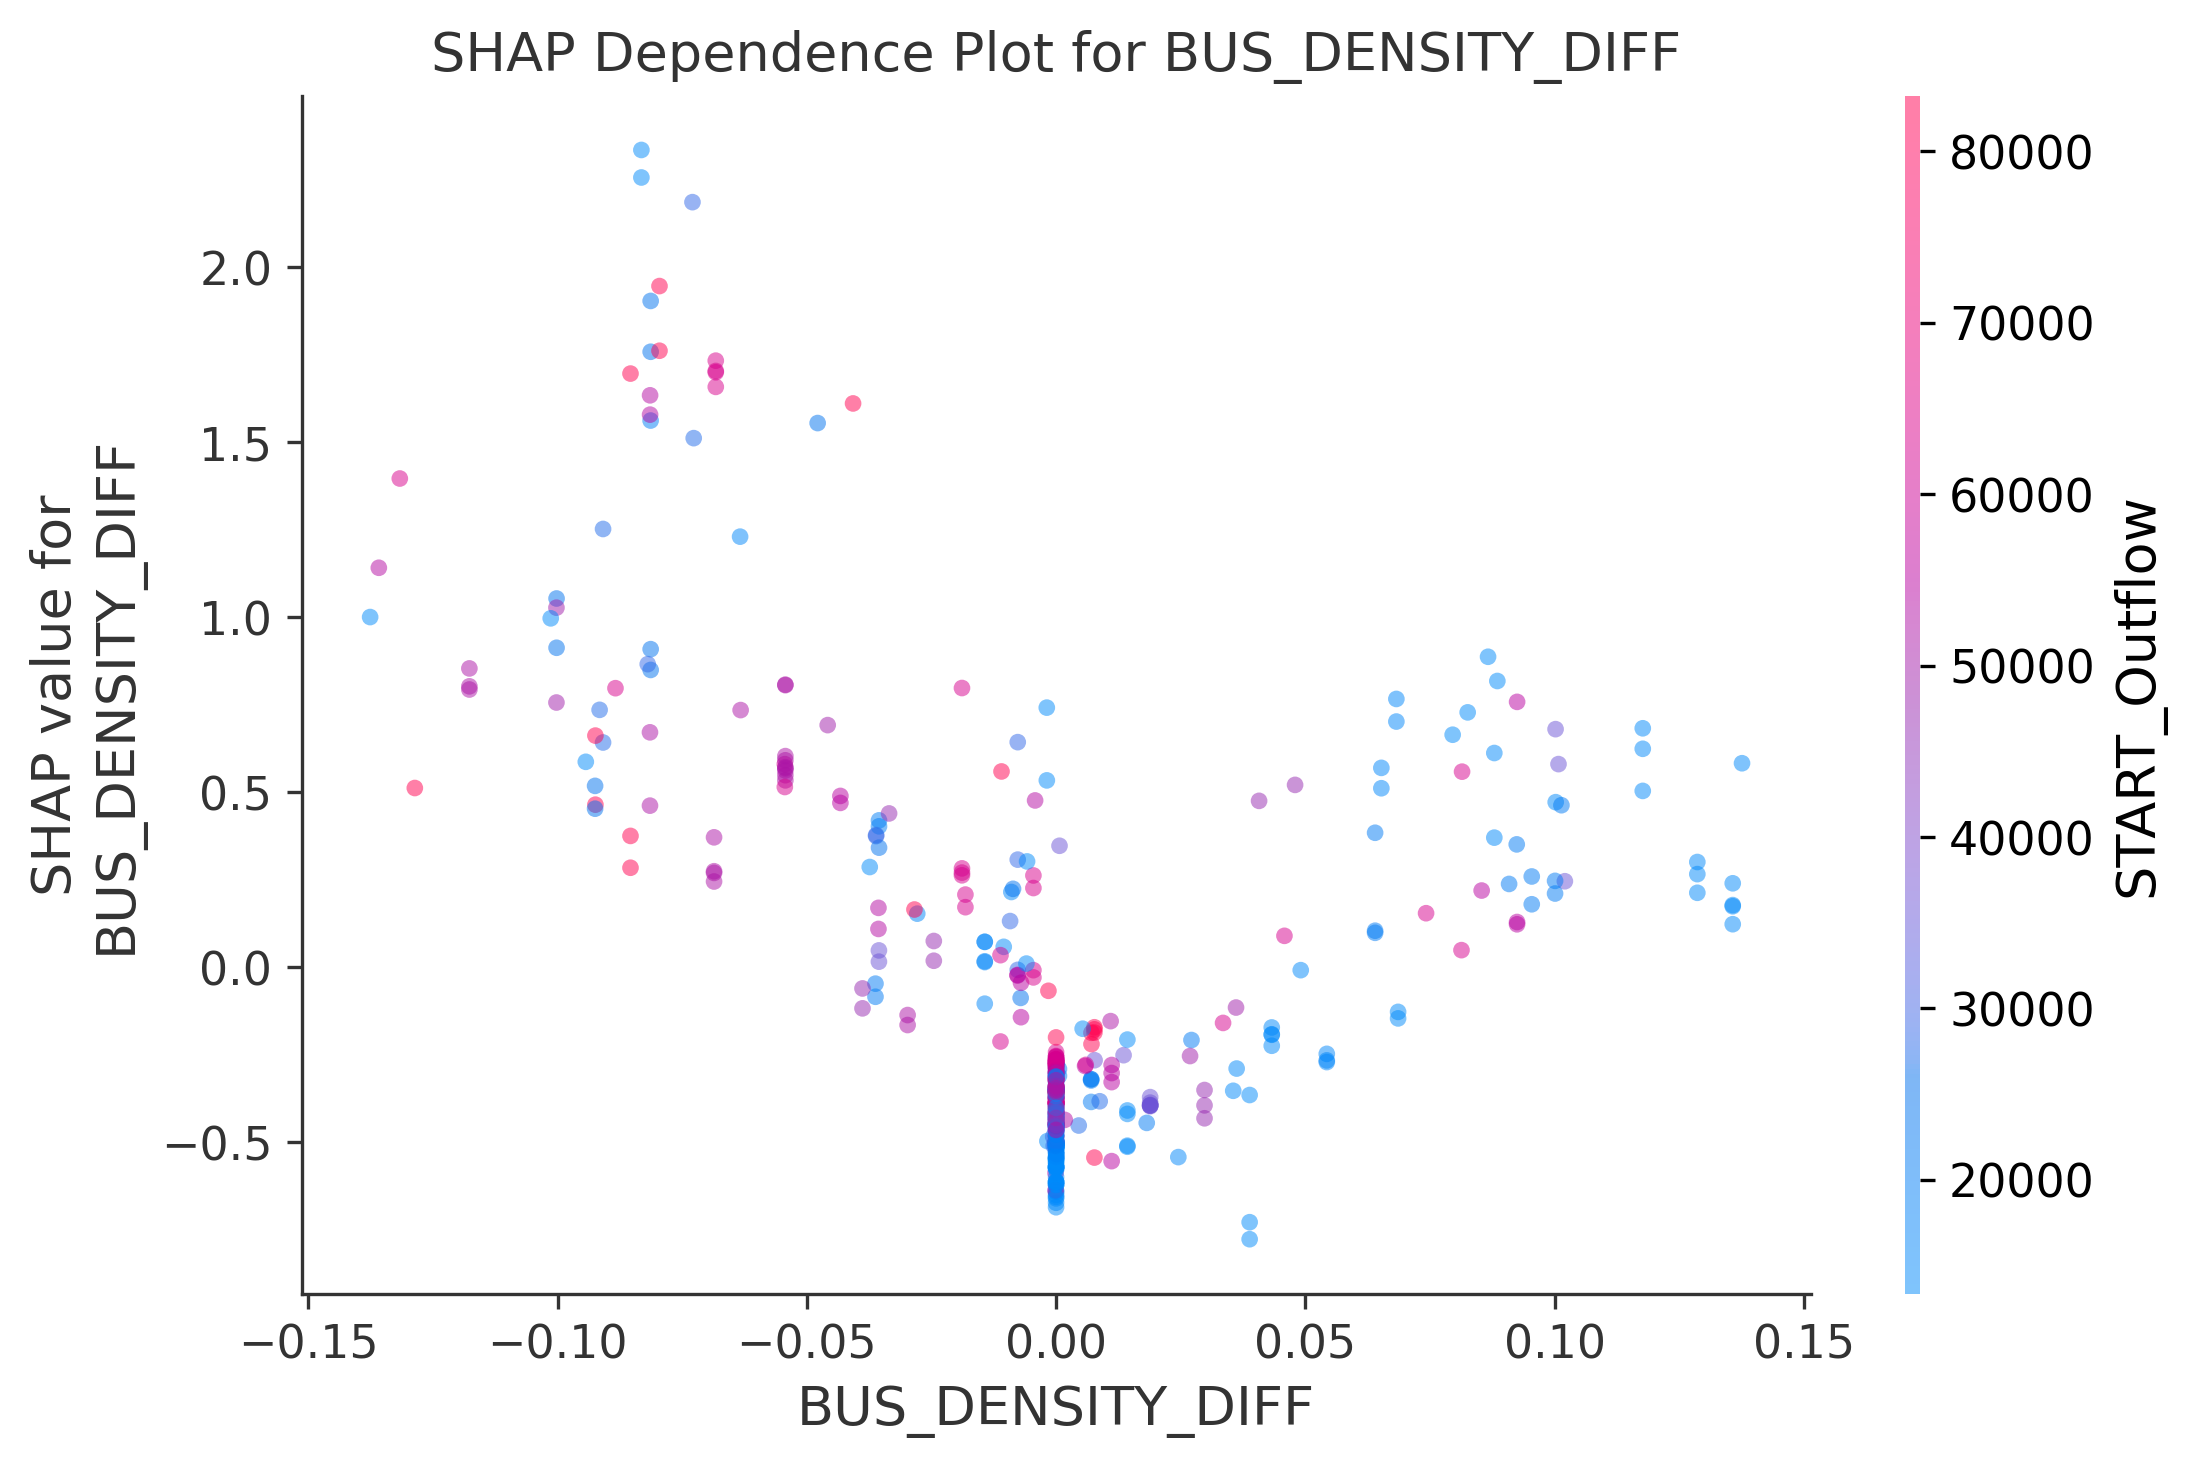

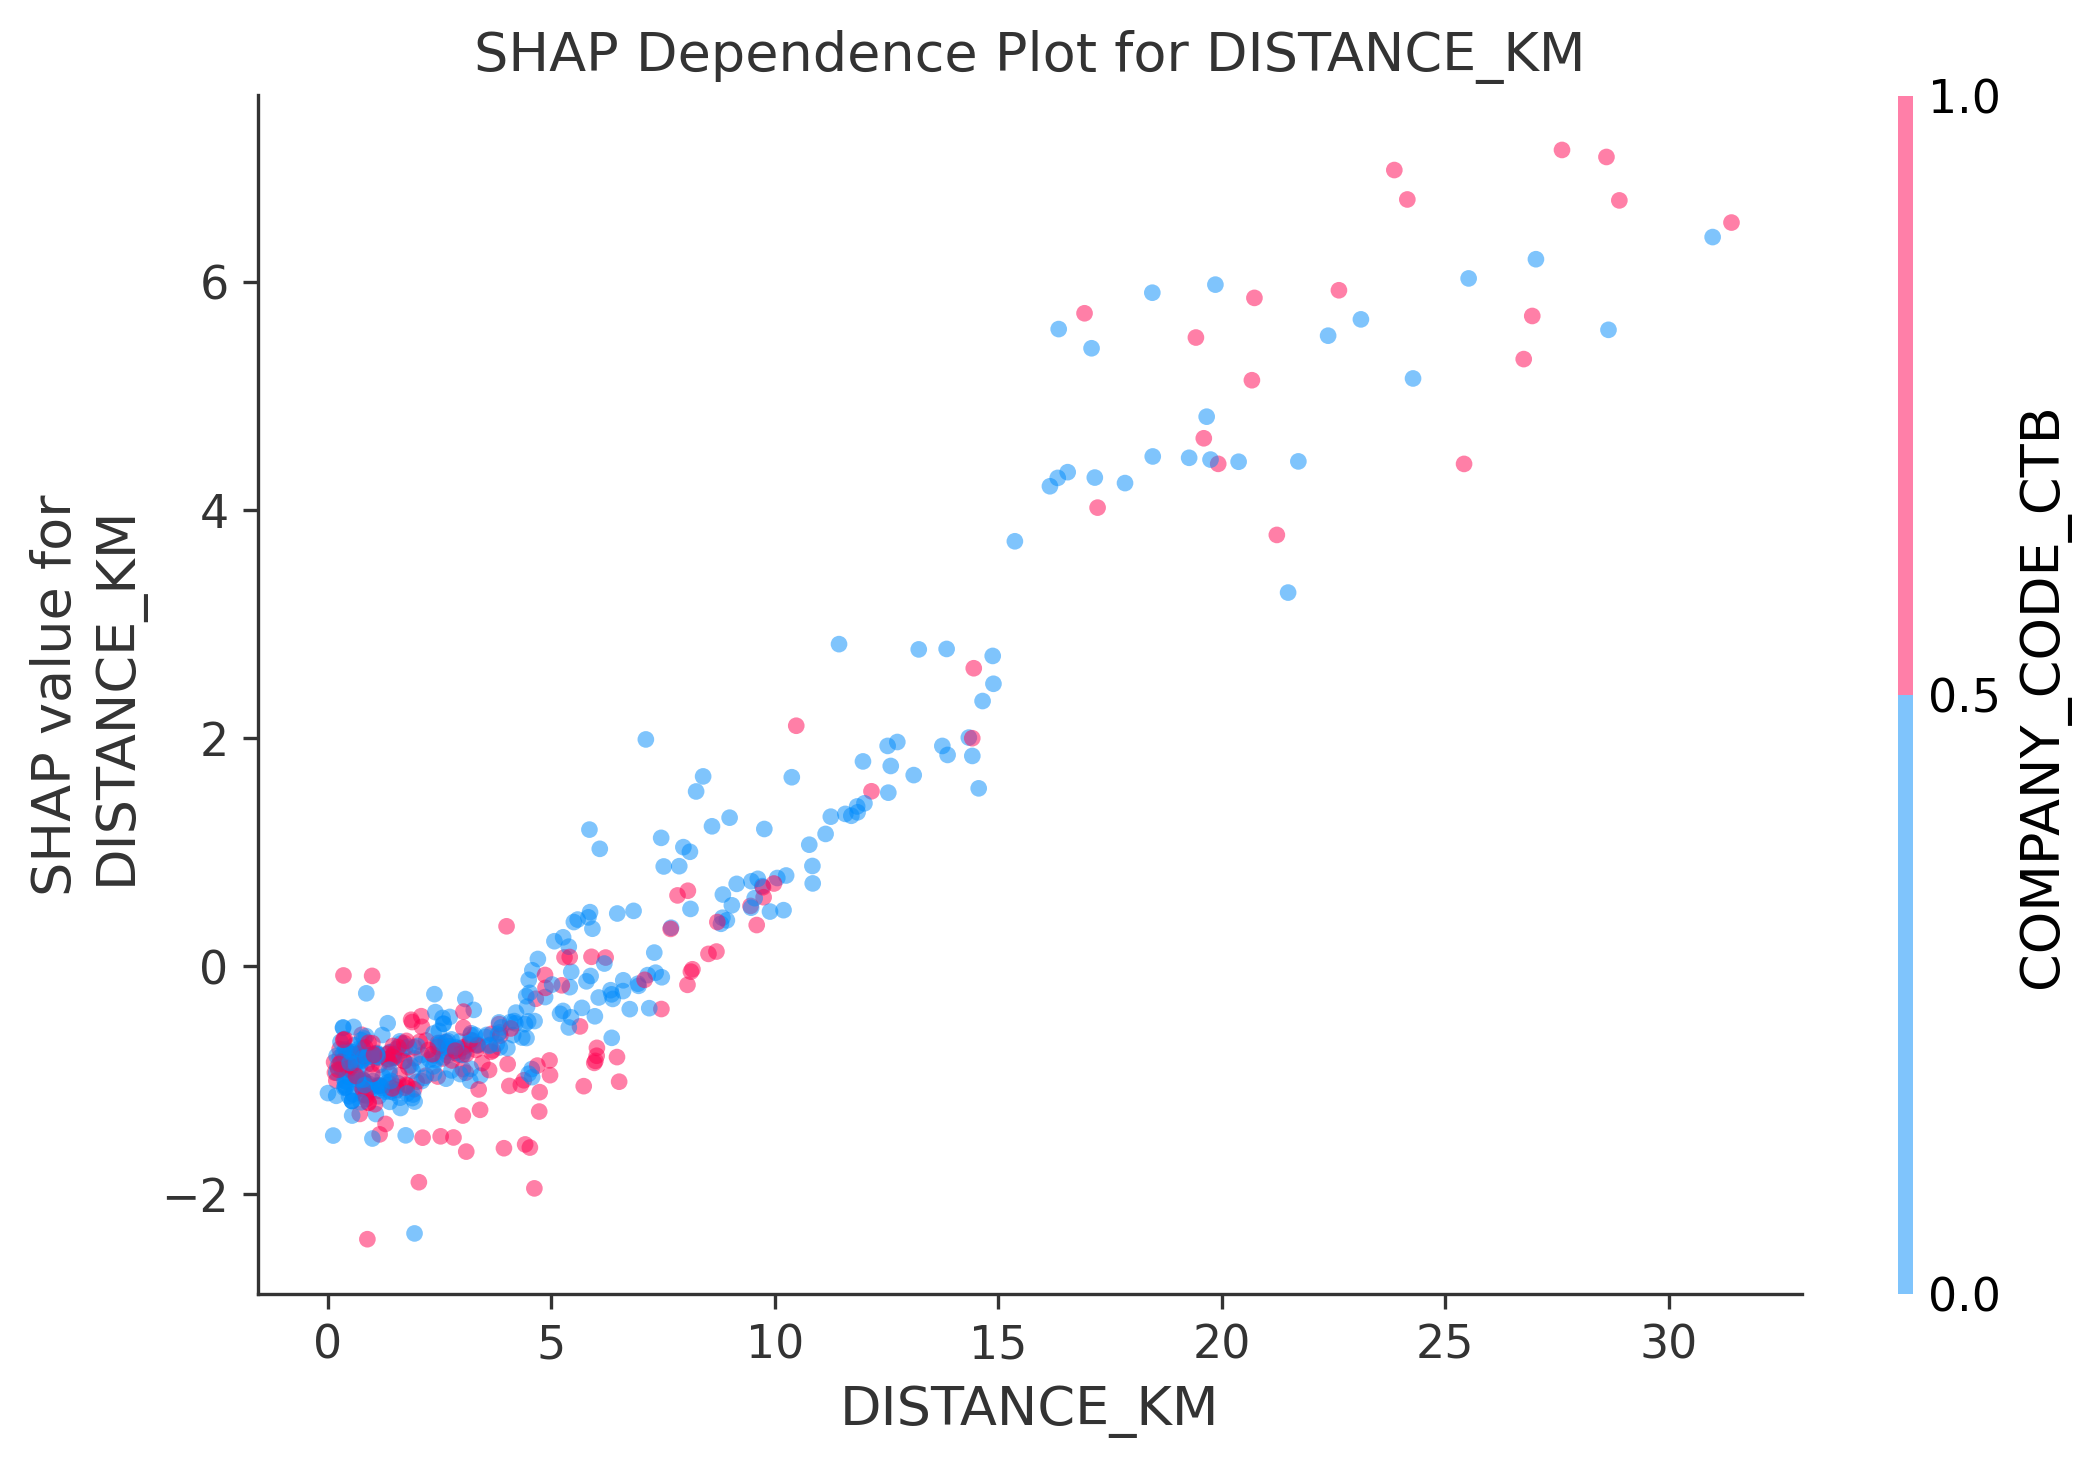

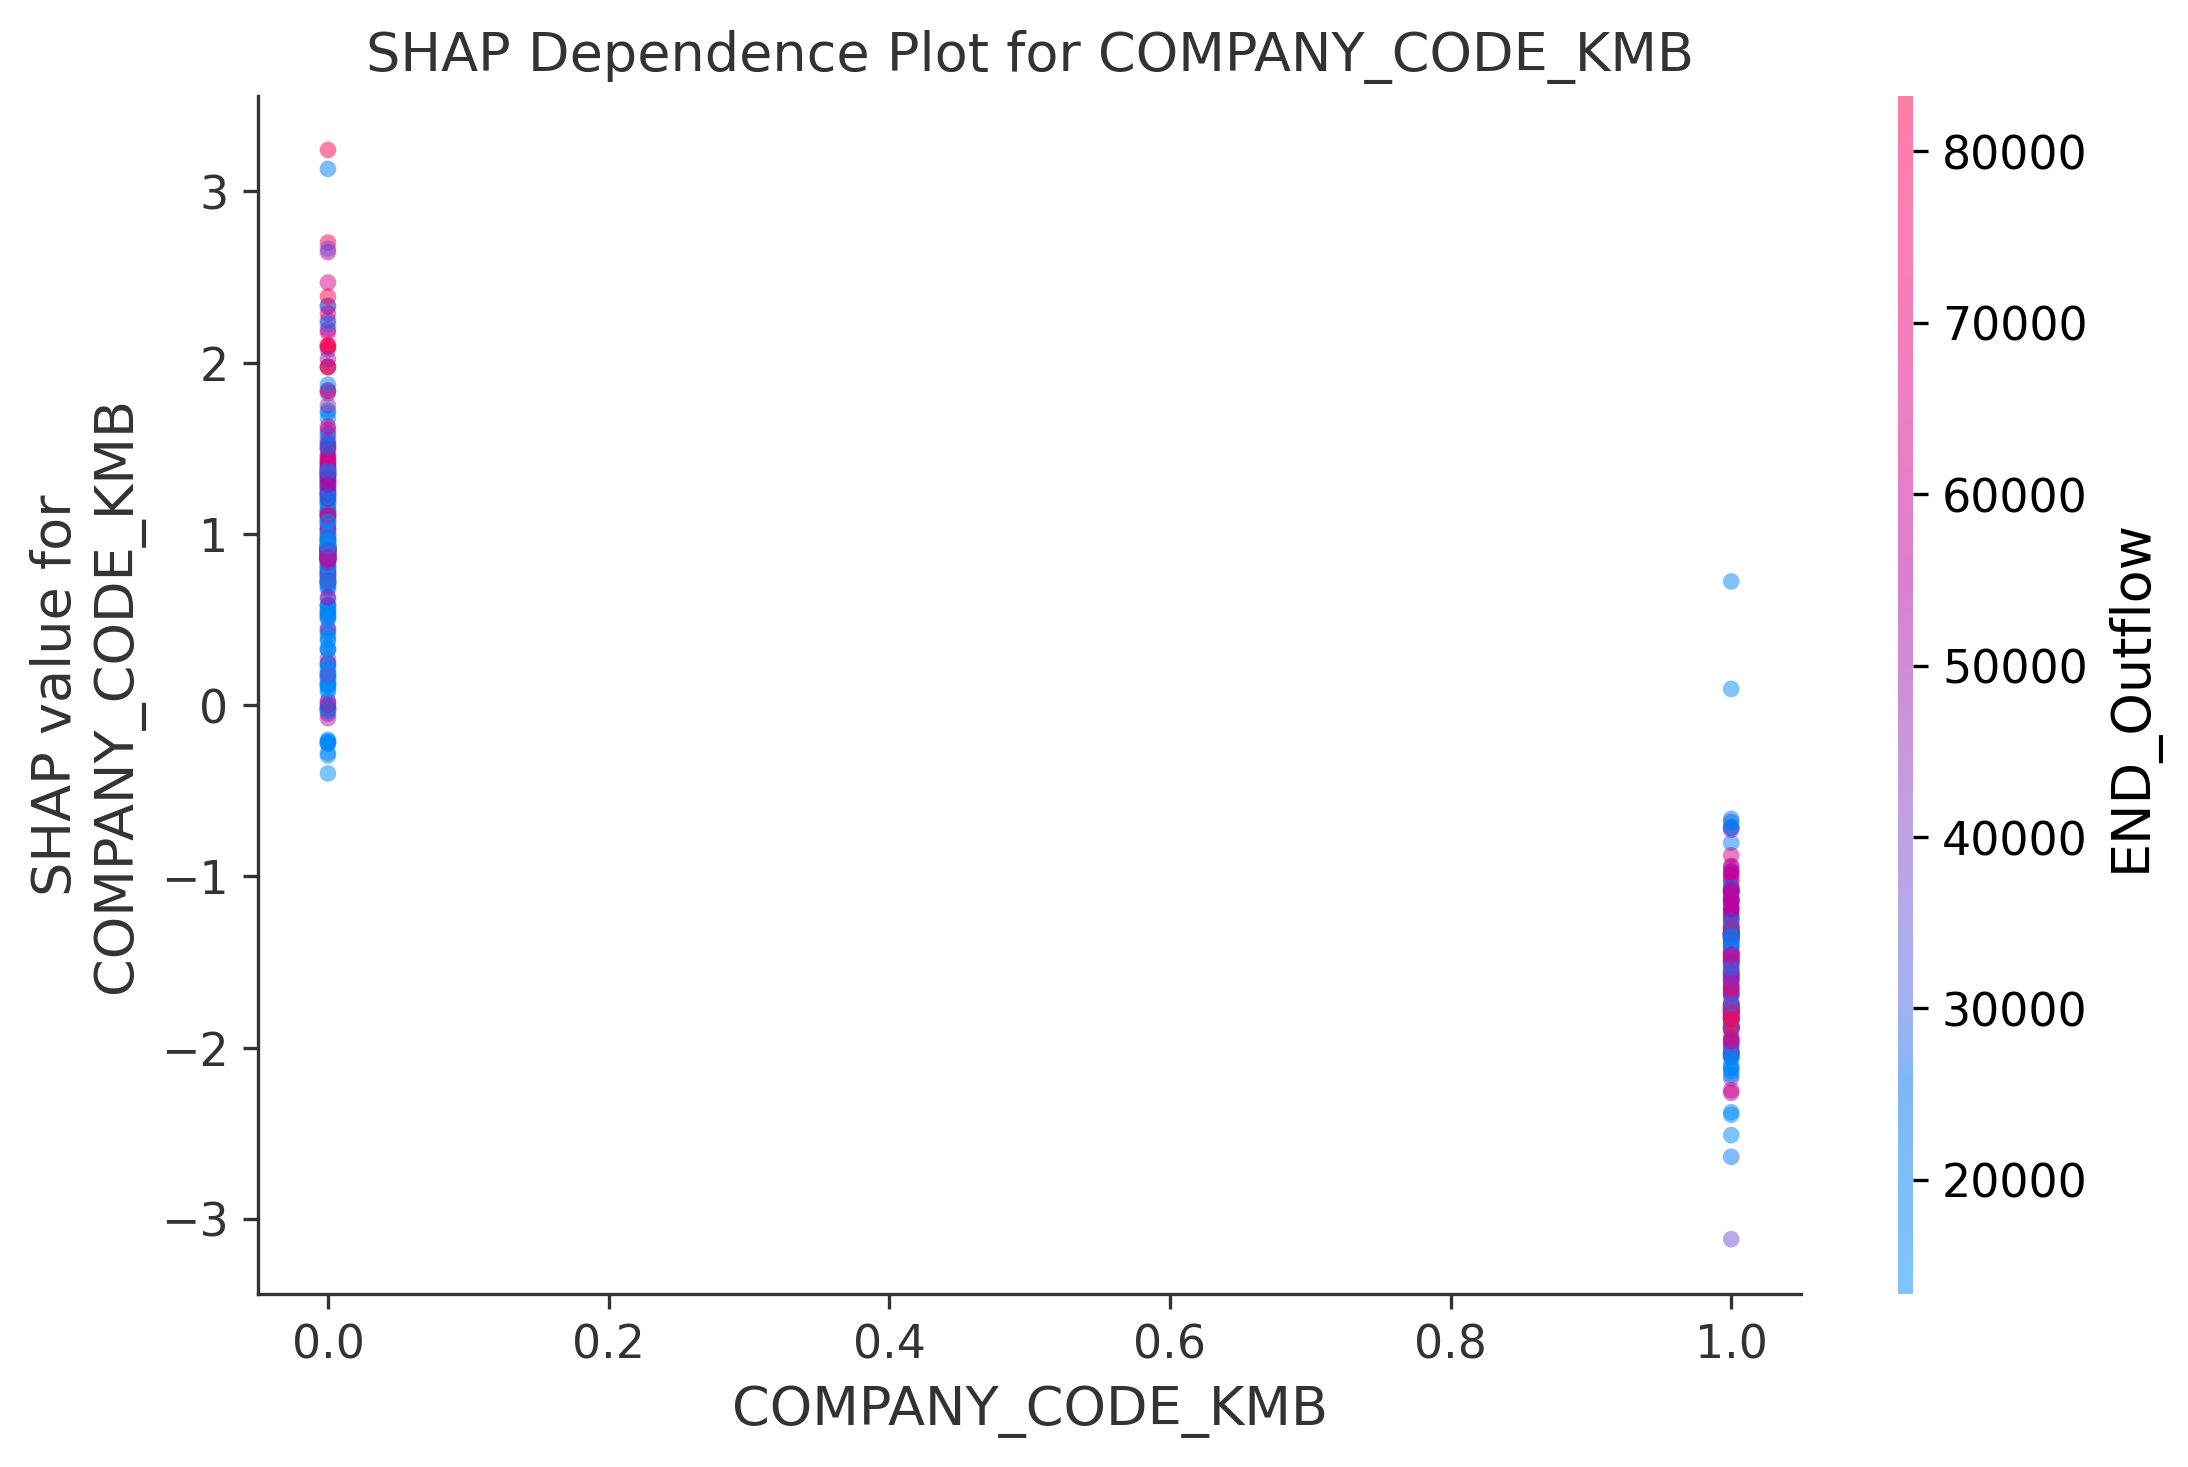

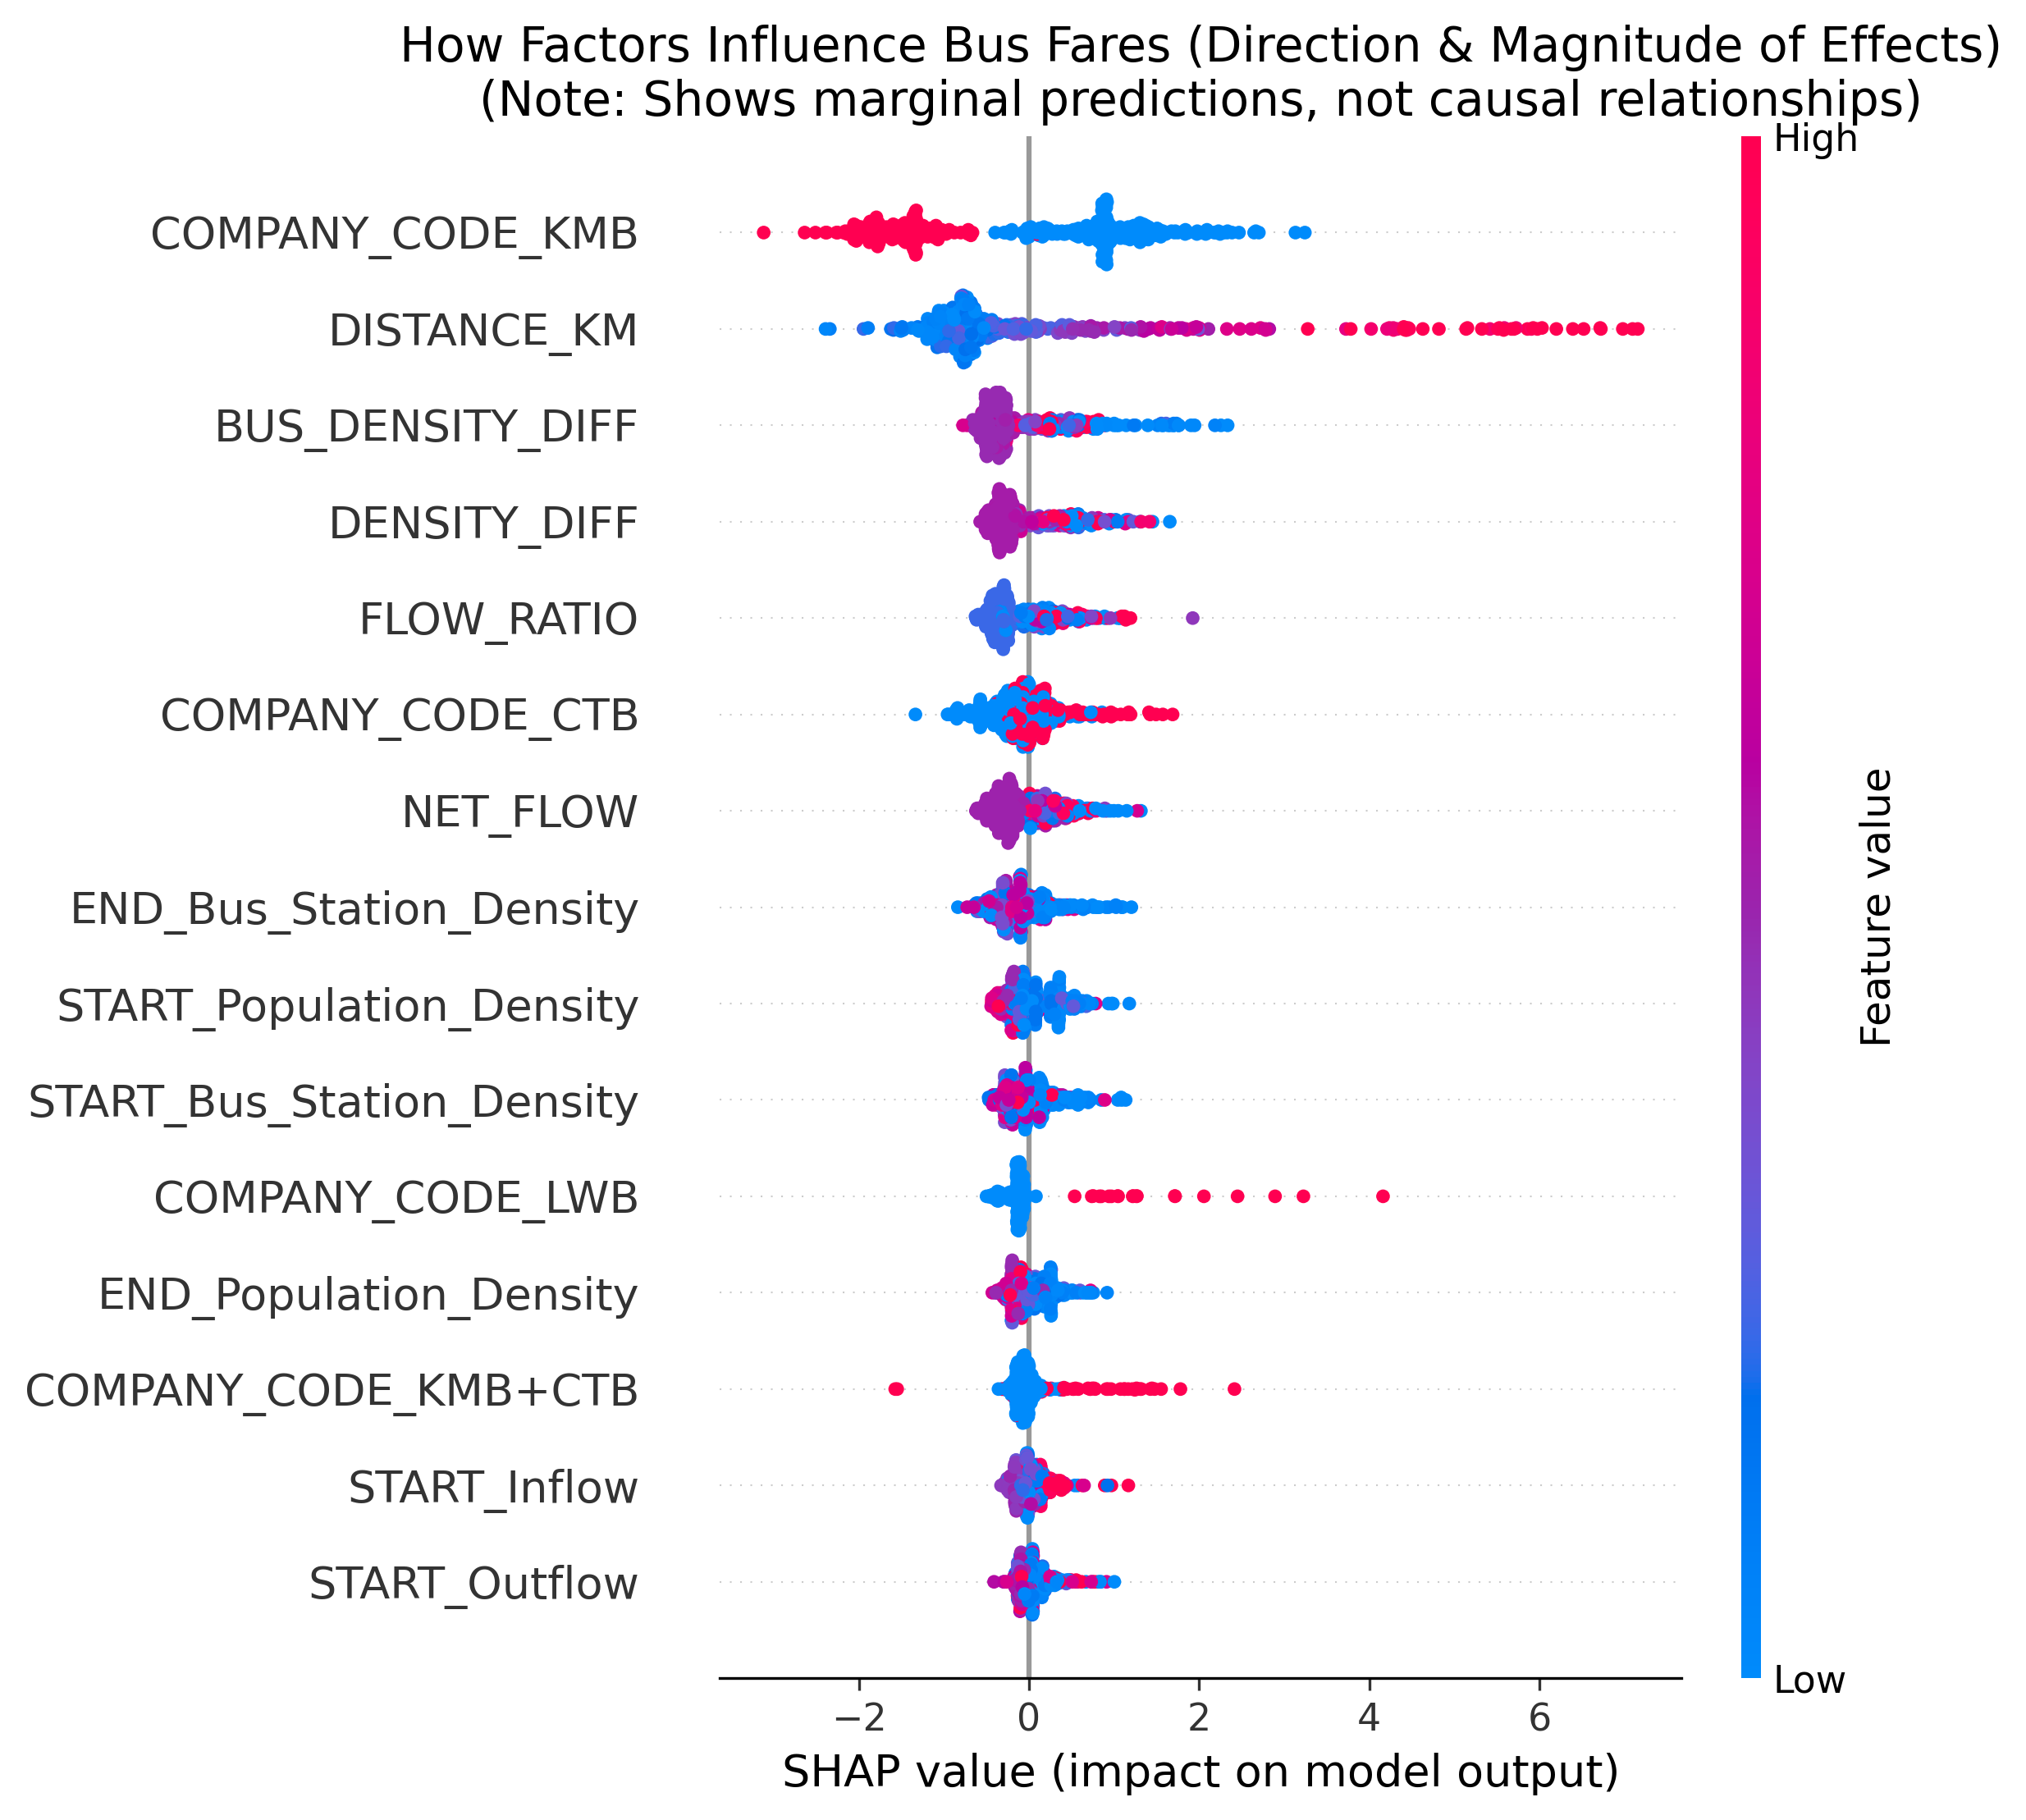


### === MODEL TRAINING AND EVALUATION ===

#### Random Forest Model for Identifying Influential Factors
**Note:** Using Random Forest with the specified hyperparameters.

**Random Forest Model Information:**
- Train RMSE: 5.9546
- Test RMSE: 6.0965
- Train R²: 0.5064
- Test R²: 0.4752
- Train MAE: 3.6680
- Test MAE: 3.7597

**Random Forest Feature Importance (Top 15):**
| Feature                     | Importance   |
|-----------------------------|--------------|
| DISTANCE_KM                  | 0.302444     |
| BUS_DENSITY_DIFF             | 0.061587     |
| COMPANY_CODE_KMB             | 0.058879     |
| DENSITY_DIFF                 | 0.057207     |
| FLOW_RATIO                   | 0.038398     |
| NET_FLOW                     | 0.035825     |
| COMPANY_CODE_CTB             | 0.032661     |
| END_Bus_Station_Density      | 0.032589     |
| START_Bus_Station_Density    | 0.032009     |
| START_Population_Density     | 0.031721     |
| END_Population_Density       | 0.029405     |
| START_Inflow                 | 0.024943     |
| START_Outflow                | 0.024546     |
| END_Inflow                   | 0.024456     |
| COMPANY_CODE_LWB             | 0.022178     |

**Calculating SHAP values for Random Forest model...**
**Note:** Using SHAP analysis to understand the directional effects of features on the target variable.

### === QUANTIFIED SHAP VALUES FOR TOP FEATURES ===
| Feature                     | Mean Absolute SHAP | Mean SHAP | Std SHAP  | Min SHAP  | Max SHAP  |
|-----------------------------|--------------------|-----------|-----------|-----------|-----------|
| COMPANY_CODE_KMB             | 1.245222           | -0.137396 | 1.364000  | -3.119442 | 3.242434  |
| DISTANCE_KM                  | 1.208749           | 0.045749  | 1.798978  | -2.392158 | 7.156398  |
| BUS_DENSITY_DIFF             | 0.456215           | -0.079939 | 0.554335  | -0.776755 | 2.334617  |
| DENSITY_DIFF                 | 0.373193           | -0.012703 | 0.444046  | -0.574872 | 1.654736  |
| FLOW_RATIO                   | 0.327020           | -0.060123 | 0.386119  | -0.629566 | 1.924105  |
| COMPANY_CODE_CTB             | 0.292665           | -0.049601 | 0.395815  | -1.335654 | 1.687934  |
| NET_FLOW                     | 0.290475           | -0.018941 | 0.347192  | -0.624907 | 1.315079  |
| END_Bus_Station_Density      | 0.256333           | -0.091949 | 0.309552  | -0.836468 | 1.203190  |
| START_Population_Density     | 0.233671           | 0.036202  | 0.287961  | -0.445290 | 1.178513  |
| START_Bus_Station_Density    | 0.214229           | -0.011213 | 0.274500  | -0.475506 | 1.136049  |


In [ ]:
#### ----------- RANDOM FOREST MODEL ------------- #########

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr, ttest_ind, mannwhitneyu, permutation_test
from sklearn.model_selection import train_test_split, RandomizedSearchCV, KFold, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.inspection import PartialDependenceDisplay
import shap
import warnings
warnings.filterwarnings('ignore')

model_data = pd.read_csv(r"C:\Users\jonch\COMP3522\submission\Feature_Engineering_Dependencies\Model_data.csv")

# Define features to keep (including one-hot encoded columns)
numeric_features = [
    'PRICE', 'DISTANCE_KM', 'START_MonthlyMedianIncome', 'END_MonthlyMedianIncome',
    'START_Population_Density', 'END_Population_Density', 'START_Inflow', 'START_Outflow',
    'END_Inflow', 'END_Outflow', 'FLOW_RATIO', 'NET_FLOW', 'INCOME_DIFF', 'DENSITY_DIFF',
    'BUS_DENSITY_DIFF', 'START_Bus_Station_Density', 'END_Bus_Station_Density'
]

company_cols = [col for col in model_data.columns if col.startswith('COMPANY_CODE_')]

start_district_cols = [col for col in model_data.columns if col.startswith('START_DISTRICT_')]
end_district_cols = [col for col in model_data.columns if col.startswith('END_DISTRICT_')]

# combine features
all_features = numeric_features + company_cols + start_district_cols + end_district_cols

data = model_data[all_features]

#check missing vals
print("Missing values in the dataset:")
print(data.isnull().sum().sum())

#handle missing vals
if data.isnull().sum().sum() > 0:
    data = data.fillna(data.median())

# target var and features
y = data['PRICE']
X = data.drop('PRICE', axis=1)

#80/20 test/train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Calculate SPEARMAN correlations with target variable
print("\n=== SPEARMAN RANK CORRELATIONS WITH PRICE ===")
correlations = []
for feature in X.columns:
    if feature in numeric_features:  # Only calculate for numeric features
        corr, p = spearmanr(X[feature], y, nan_policy='omit')
        correlations.append((feature, corr, p))

correlations.sort(key=lambda x: abs(x[1]), reverse=True)

for feature, corr, p in correlations:
    print(f"{feature:>30}: ρ = {corr:.4f} (p = {p:.4f})")


#MODEL TRAINING AND EVAL
print("We are now training our model and evaluating it")

# ----------------- RANDOM FOREST MODEL -----------------
print("\nRandom Forest Model for Identifying Influential Factors")
print("Note: Using Random Forest with the specified hyperparameters.")

# Perform RandomizedSearchCV with cross-validation
random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_grid,
    n_iter=10,  # Number of different combinations to test
    scoring='neg_mean_squared_error',  # You can change this based on your evaluation metric
    cv=5,  # 5-fold cross-validation
    verbose=2,
    random_state=42,
    n_jobs=-1  # Use all cores
)

# Fit the model with RandomizedSearchCV
random_search.fit(X_train, y_train)  

print("\nBest Hyperparameters Found:")
print(random_search.best_params_)

#get the best model to train 
rf_model = random_search.best_estimator_

#train and evaluate
rf_model.fit(X_train, y_train)

rf_train_preds = rf_model.predict(X_train)
rf_test_preds = rf_model.predict(X_test)

print("\nRandom Forest Model Eval:")
print(f"Train RMSE: {np.sqrt(mean_squared_error(y_train, rf_train_preds)):.4f}")
print(f"Test RMSE: {np.sqrt(mean_squared_error(y_test, rf_test_preds)):.4f}")
print(f"Train R²: {r2_score(y_train, rf_train_preds):.4f}")
print(f"Test R²: {r2_score(y_test, rf_test_preds):.4f}")
print(f"Train MAE: {mean_absolute_error(y_train, rf_train_preds):.4f}")
print(f"Test MAE: {mean_absolute_error(y_test, rf_test_preds):.4f}")

# Feature importance analysis
rf_feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nRandom Forest Feature Importance (Top 15):")
print(rf_feature_importance.head(15))

# Save feature importance to CSV
rf_feature_importance.to_csv('/content/drive/MyDrive/rf_feature_importance.csv', index=False)

# Visualize feature importance
plt.figure(figsize=(12, 8))
top_n = 15
top_features = rf_feature_importance.head(top_n)
sns.barplot(x='Importance', y='Feature', data=top_features)
plt.title('Top 15 Features by Random Forest Importance', fontsize=16)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/rf_feature_importance.png', dpi=300, bbox_inches='tight')
plt.close()

# ----------------- SHAP ANALYSIS  -----------------
print("\nCalculating SHAP values for Random Forest model...")
print("Note: Using SHAP analysis to understand the directional effects of features on the target variable.")

X_shap = X_test.iloc[:2000]  


explainer_rf = shap.TreeExplainer(rf_model)
shap_values_rf = explainer_rf.shap_values(X_shap)

# SHAP summary plot 
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values_rf, X_shap, plot_type="bar", show=False)
plt.title('Factors Influencing Bus Fares (SHAP Analysis - Random Forest)', fontsize=16)
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/rf_shap_importance.png', dpi=300, bbox_inches='tight')
plt.close()

# SHAP summary plot 
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values_rf, X_shap, show=False, max_display=15)
plt.title('How Factors Influence Bus Fares (Direction & Magnitude of Effects)\n(Note: Shows marginal predictions, not causal relationships)', fontsize=14)
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/rf_shap_summary.png', dpi=300, bbox_inches='tight')
plt.close()

# Quantify SHAP values for top features
print("\n=== QUANTIFIED SHAP VALUES FOR TOP FEATURES ===")
top_features_list = rf_feature_importance['Feature'].head(10).tolist()

shap_df = pd.DataFrame()
for feature in top_features_list:
    if feature in X_shap.columns:
        feature_idx = list(X_shap.columns).index(feature)
        shap_df[feature] = shap_values_rf[:, feature_idx]

shap_stats = pd.DataFrame({
    'Mean Absolute SHAP': shap_df.abs().mean(),
    'Mean SHAP': shap_df.mean(),
    'Std SHAP': shap_df.std(),
    'Min SHAP': shap_df.min(),
    'Max SHAP': shap_df.max()
}).sort_values('Mean Absolute SHAP', ascending=False)

print(shap_stats)

shap_stats.to_csv('/content/drive/MyDrive/rf_shap_statistics.csv')

# Individual SHAP dependence plots for top 5 features
print("\nCreating SHAP dependence plots for top features")
top_5_features = top_features_list[:5]
for feature in top_5_features:
    if feature in X_shap.columns:
        plt.figure(figsize=(10, 6))
        feature_idx = list(X_shap.columns).index(feature)
        shap.dependence_plot(
            feature_idx,
            shap_values_rf,
            X_shap,
            show=False,
            title=f"SHAP Dependence Plot for {feature}",
            alpha=0.5  
        )
        plt.tight_layout()
        plt.savefig(f'/content/drive/MyDrive/rf_shap_dependence_{feature}.png', dpi=300, bbox_inches='tight')
        plt.close()

# ----------------- PARTIAL DEPENDENCE PLOTS -----------------
print("\n=== PARTIAL DEPENDENCE PLOTS ===")

# Filter only numeric features from top features
numeric_top_features = [f for f in top_features_list if f in numeric_features and f != 'PRICE']
numeric_top_features = numeric_top_features[:5]  # Take top 5 numeric features

# Create partial dependence plots
fig, ax = plt.subplots(figsize=(14, 10))
display = PartialDependenceDisplay.from_estimator(
    rf_model,
    X_train,
    features=numeric_top_features,
    kind="both",  # Show both the average and individual partial dependence
    n_jobs=-1,
    grid_resolution=50,
    random_state=42,
    ax=ax
)
plt.suptitle('Partial Dependence Plots for Top Features', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig('/content/drive/MyDrive/rf_partial_dependence_plots.png', dpi=300, bbox_inches='tight')
plt.close()

#Individual PDPs
for feature in numeric_top_features:
    fig, ax = plt.subplots(figsize=(8, 6))
    display = PartialDependenceDisplay.from_estimator(
        rf_model,
        X_train,
        features=[feature],
        kind="both",
        grid_resolution=50,
        random_state=42,
        ax=ax
    )
    plt.suptitle(f'Partial Dependence Plot for {feature}', fontsize=14)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.savefig(f'/content/drive/MyDrive/rf_pdp_{feature}.png', dpi=300, bbox_inches='tight')
    plt.close()

print("\n=== STATISTICAL VALIDATION OF FEATURE IMPORTANCE ===")

# 1. Cross-validation feature importance stability
print("\n1. Cross-validation Feature Importance Stability")
n_folds = 5
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)
importance_cv = []

for train_idx, val_idx in kf.split(X):
    X_train_cv, X_val_cv = X.iloc[train_idx], X.iloc[val_idx]
    y_train_cv, y_val_cv = y.iloc[train_idx], y.iloc[val_idx]

    # Train Random Forest model on this fold
    rf_model_cv = RandomForestRegressor(
        n_estimators=200,
        max_depth=15,
        min_samples_split=2,
        min_samples_leaf=1,
        max_features='sqrt',
        random_state=42,
        n_jobs=-1
    )
    rf_model_cv.fit(X_train_cv, y_train_cv)

    # Get feature importance
    fold_importance = pd.DataFrame({
        'Feature': X.columns,
        'Importance': rf_model_cv.feature_importances_
    })
    importance_cv.append(fold_importance)

# Calculate mean and standard deviation of feature importance across folds
importance_cv_df = pd.concat(importance_cv)
importance_stats = importance_cv_df.groupby('Feature').agg(['mean', 'std']).reset_index()
importance_stats.columns = ['Feature', 'Mean_Importance', 'Std_Importance']
importance_stats['CV'] = importance_stats['Std_Importance'] / importance_stats['Mean_Importance']  # Coefficient of variation
importance_stats = importance_stats.sort_values('Mean_Importance', ascending=False).reset_index(drop=True)

print("Feature importance stability across CV folds (top 10):")
print(importance_stats.head(10))

# Save CV importance stats to CSV
importance_stats.to_csv('/content/drive/MyDrive/rf_cv_importance_stats.csv', index=False)

# Visualize feature importance stability
plt.figure(figsize=(12, 8))
top_10_cv = importance_stats.head(10)
x = np.arange(len(top_10_cv))
width = 0.35
plt.bar(x, top_10_cv['Mean_Importance'], width, yerr=top_10_cv['Std_Importance'],
        align='center', alpha=0.7, ecolor='black', capsize=10)
plt.xticks(x, top_10_cv['Feature'], rotation=45, ha='right')
plt.ylabel('Mean Feature Importance')
plt.xlabel('Features')
plt.title('Feature Importance Stability Across CV Folds (Top 10)')
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/rf_feature_importance_stability.png', dpi=300, bbox_inches='tight')
plt.close()

# 2. Permutation feature importance
print("\n2. Permutation Feature Importance")

def compute_permutation_importance(model, X, y, feature, n_repeats=5):
    """Compute permutation importance for a single feature."""
    baseline_score = mean_squared_error(y, model.predict(X))
    scores = []

    for _ in range(n_repeats):
        # Create a copy of the feature to permute
        X_permuted = X.copy()
        # Permute the feature
        X_permuted[feature] = np.random.permutation(X_permuted[feature].values)
        # Calculate new performance
        permuted_score = mean_squared_error(y, model.predict(X_permuted))
        # Store importance (increase in error)
        importance = permuted_score - baseline_score
        scores.append(importance)

    return np.mean(scores), np.std(scores)

#permutation importance for top 15 features
permutation_results = []
print("Computing permutation importance for top 15 features...")
for feature in rf_feature_importance['Feature'].head(15):
    imp_mean, imp_std = compute_permutation_importance(rf_model, X_test, y_test, feature)
    permutation_results.append({
        'Feature': feature,
        'Permutation_Importance': imp_mean,
        'Std_Dev': imp_std
    })

permutation_df = pd.DataFrame(permutation_results)
permutation_df = permutation_df.sort_values('Permutation_Importance', ascending=False).reset_index(drop=True)

print("Permutation importance results:")
print(permutation_df)

permutation_df.to_csv('/content/drive/MyDrive/rf_permutation_importance.csv', index=False)

plt.figure(figsize=(12, 8))
plt.bar(permutation_df['Feature'], permutation_df['Permutation_Importance'],
        yerr=permutation_df['Std_Dev'], capsize=5)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Increase in MSE when Feature is Permuted')
plt.xlabel('Features')
plt.title('Permutation Feature Importance')
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/rf_permutation_importance.png', dpi=300, bbox_inches='tight')
plt.close()


### CatBoost Model ###

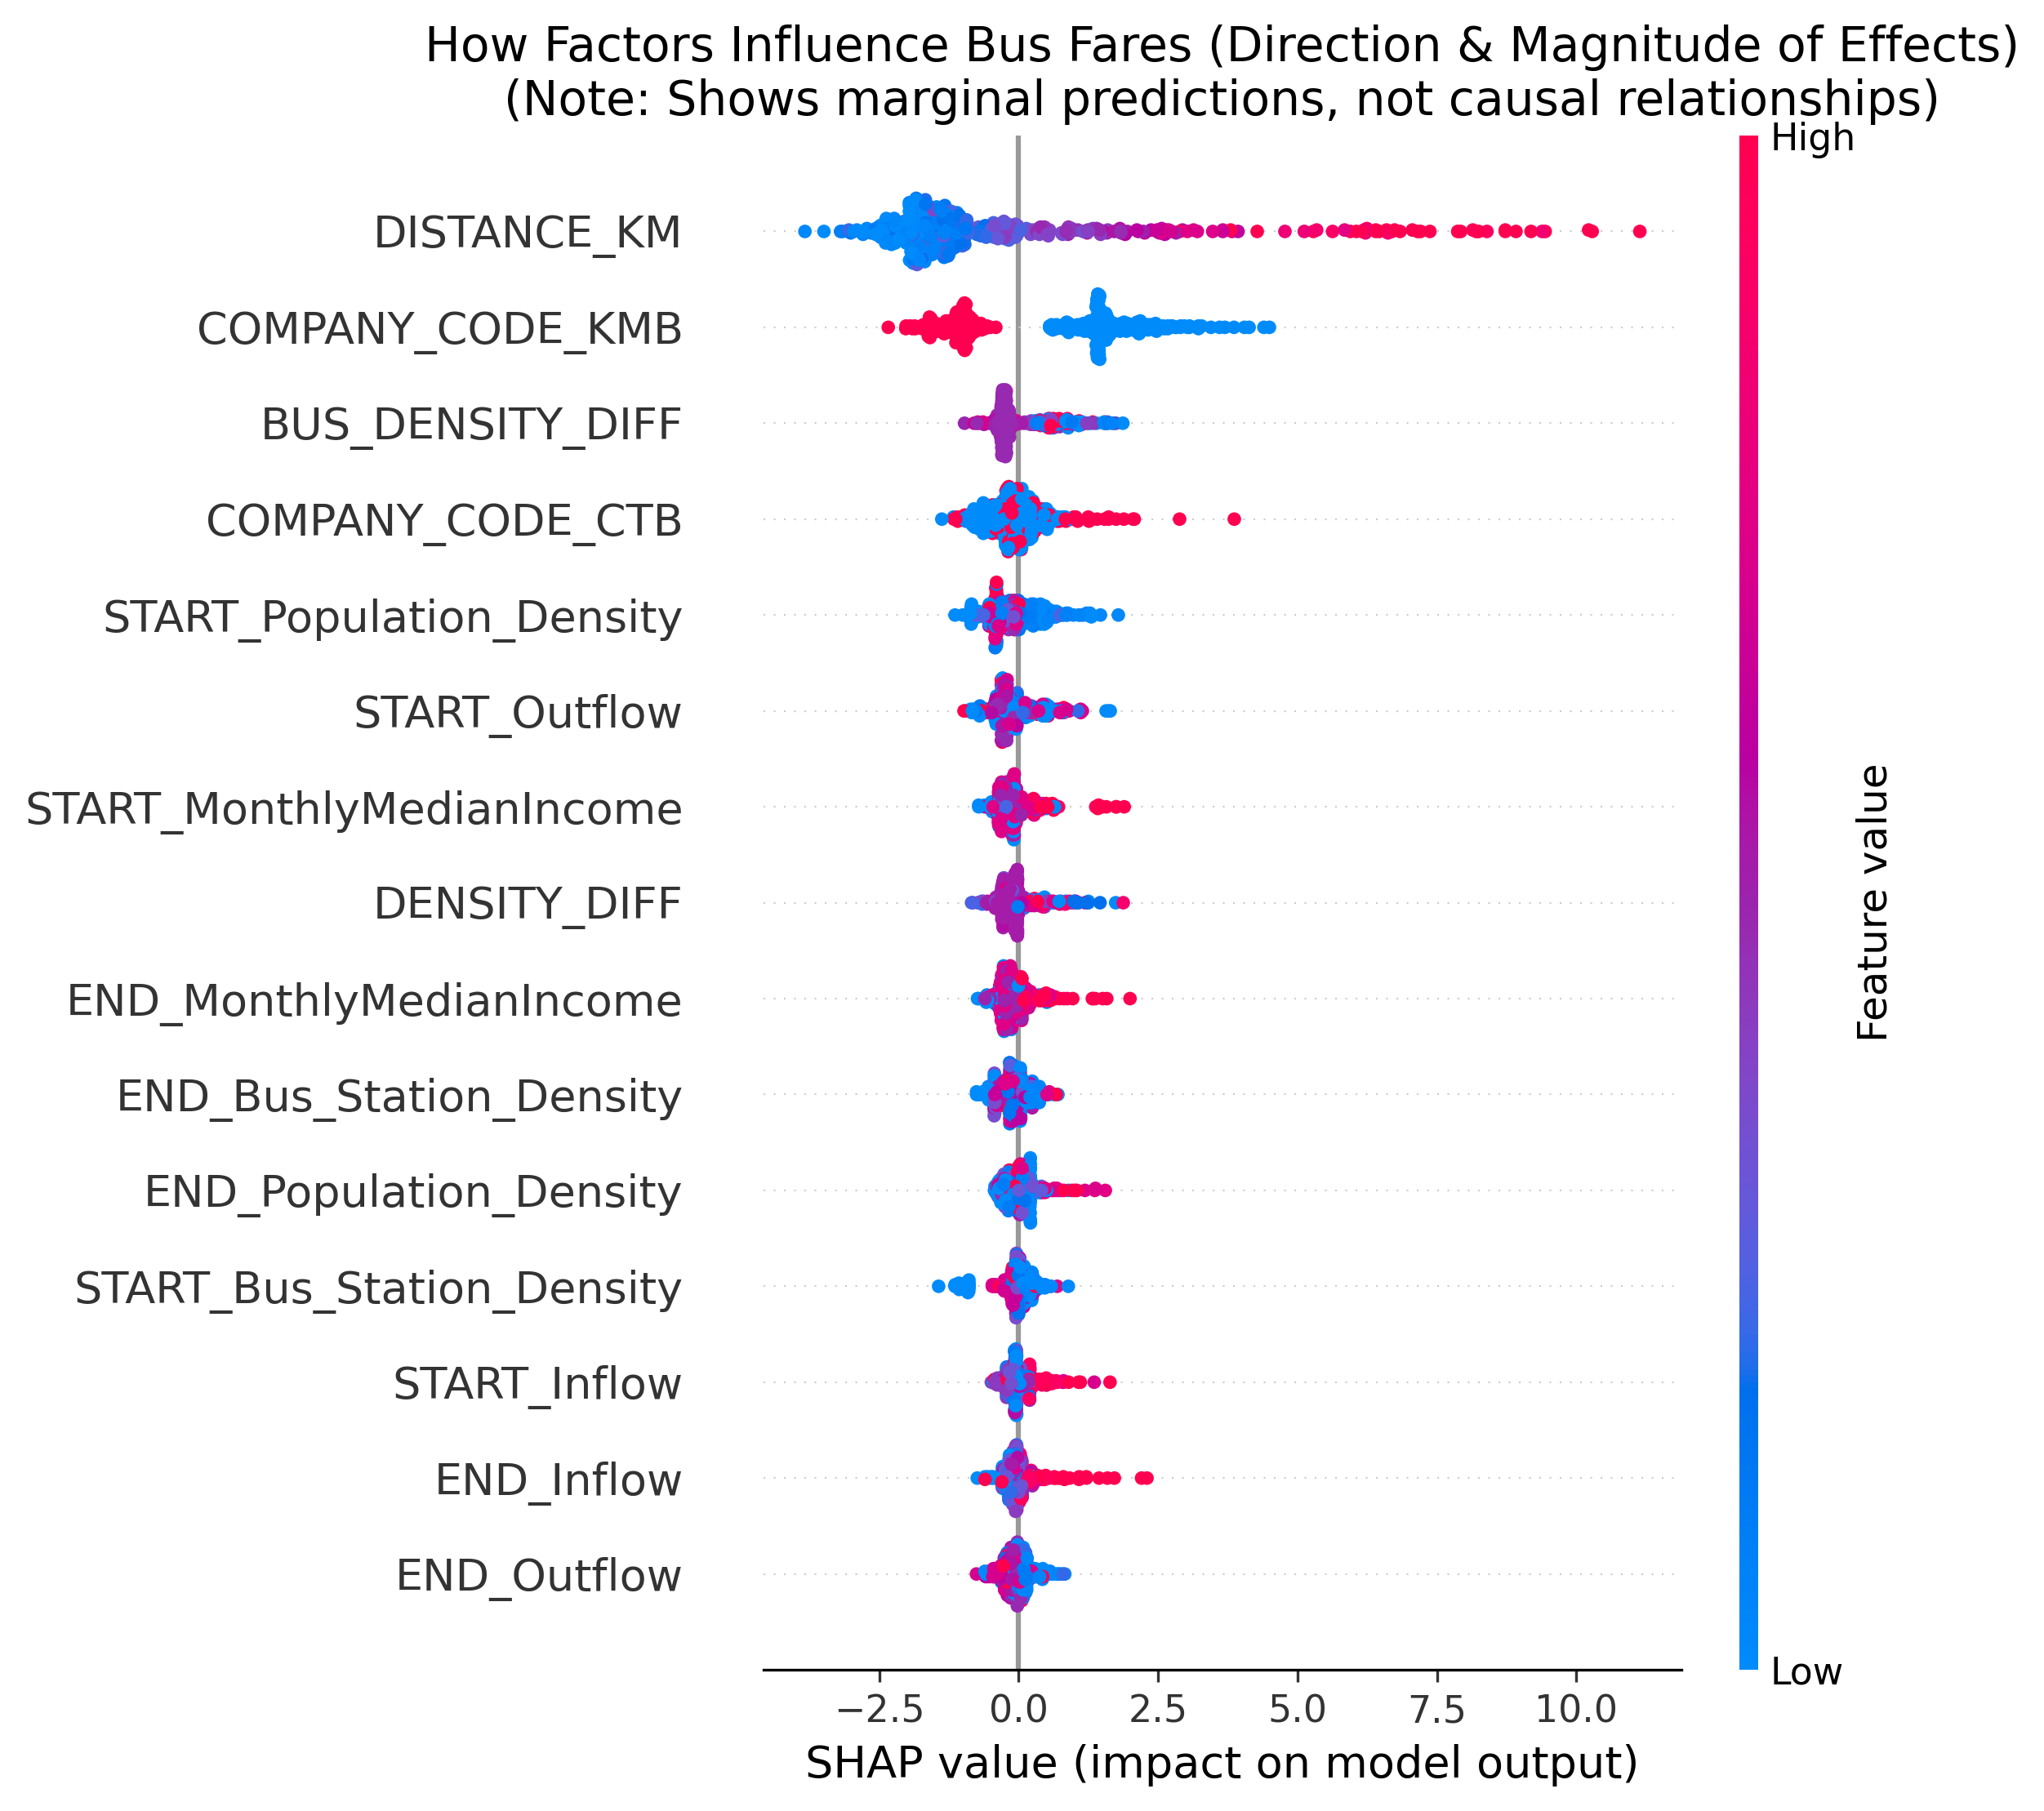

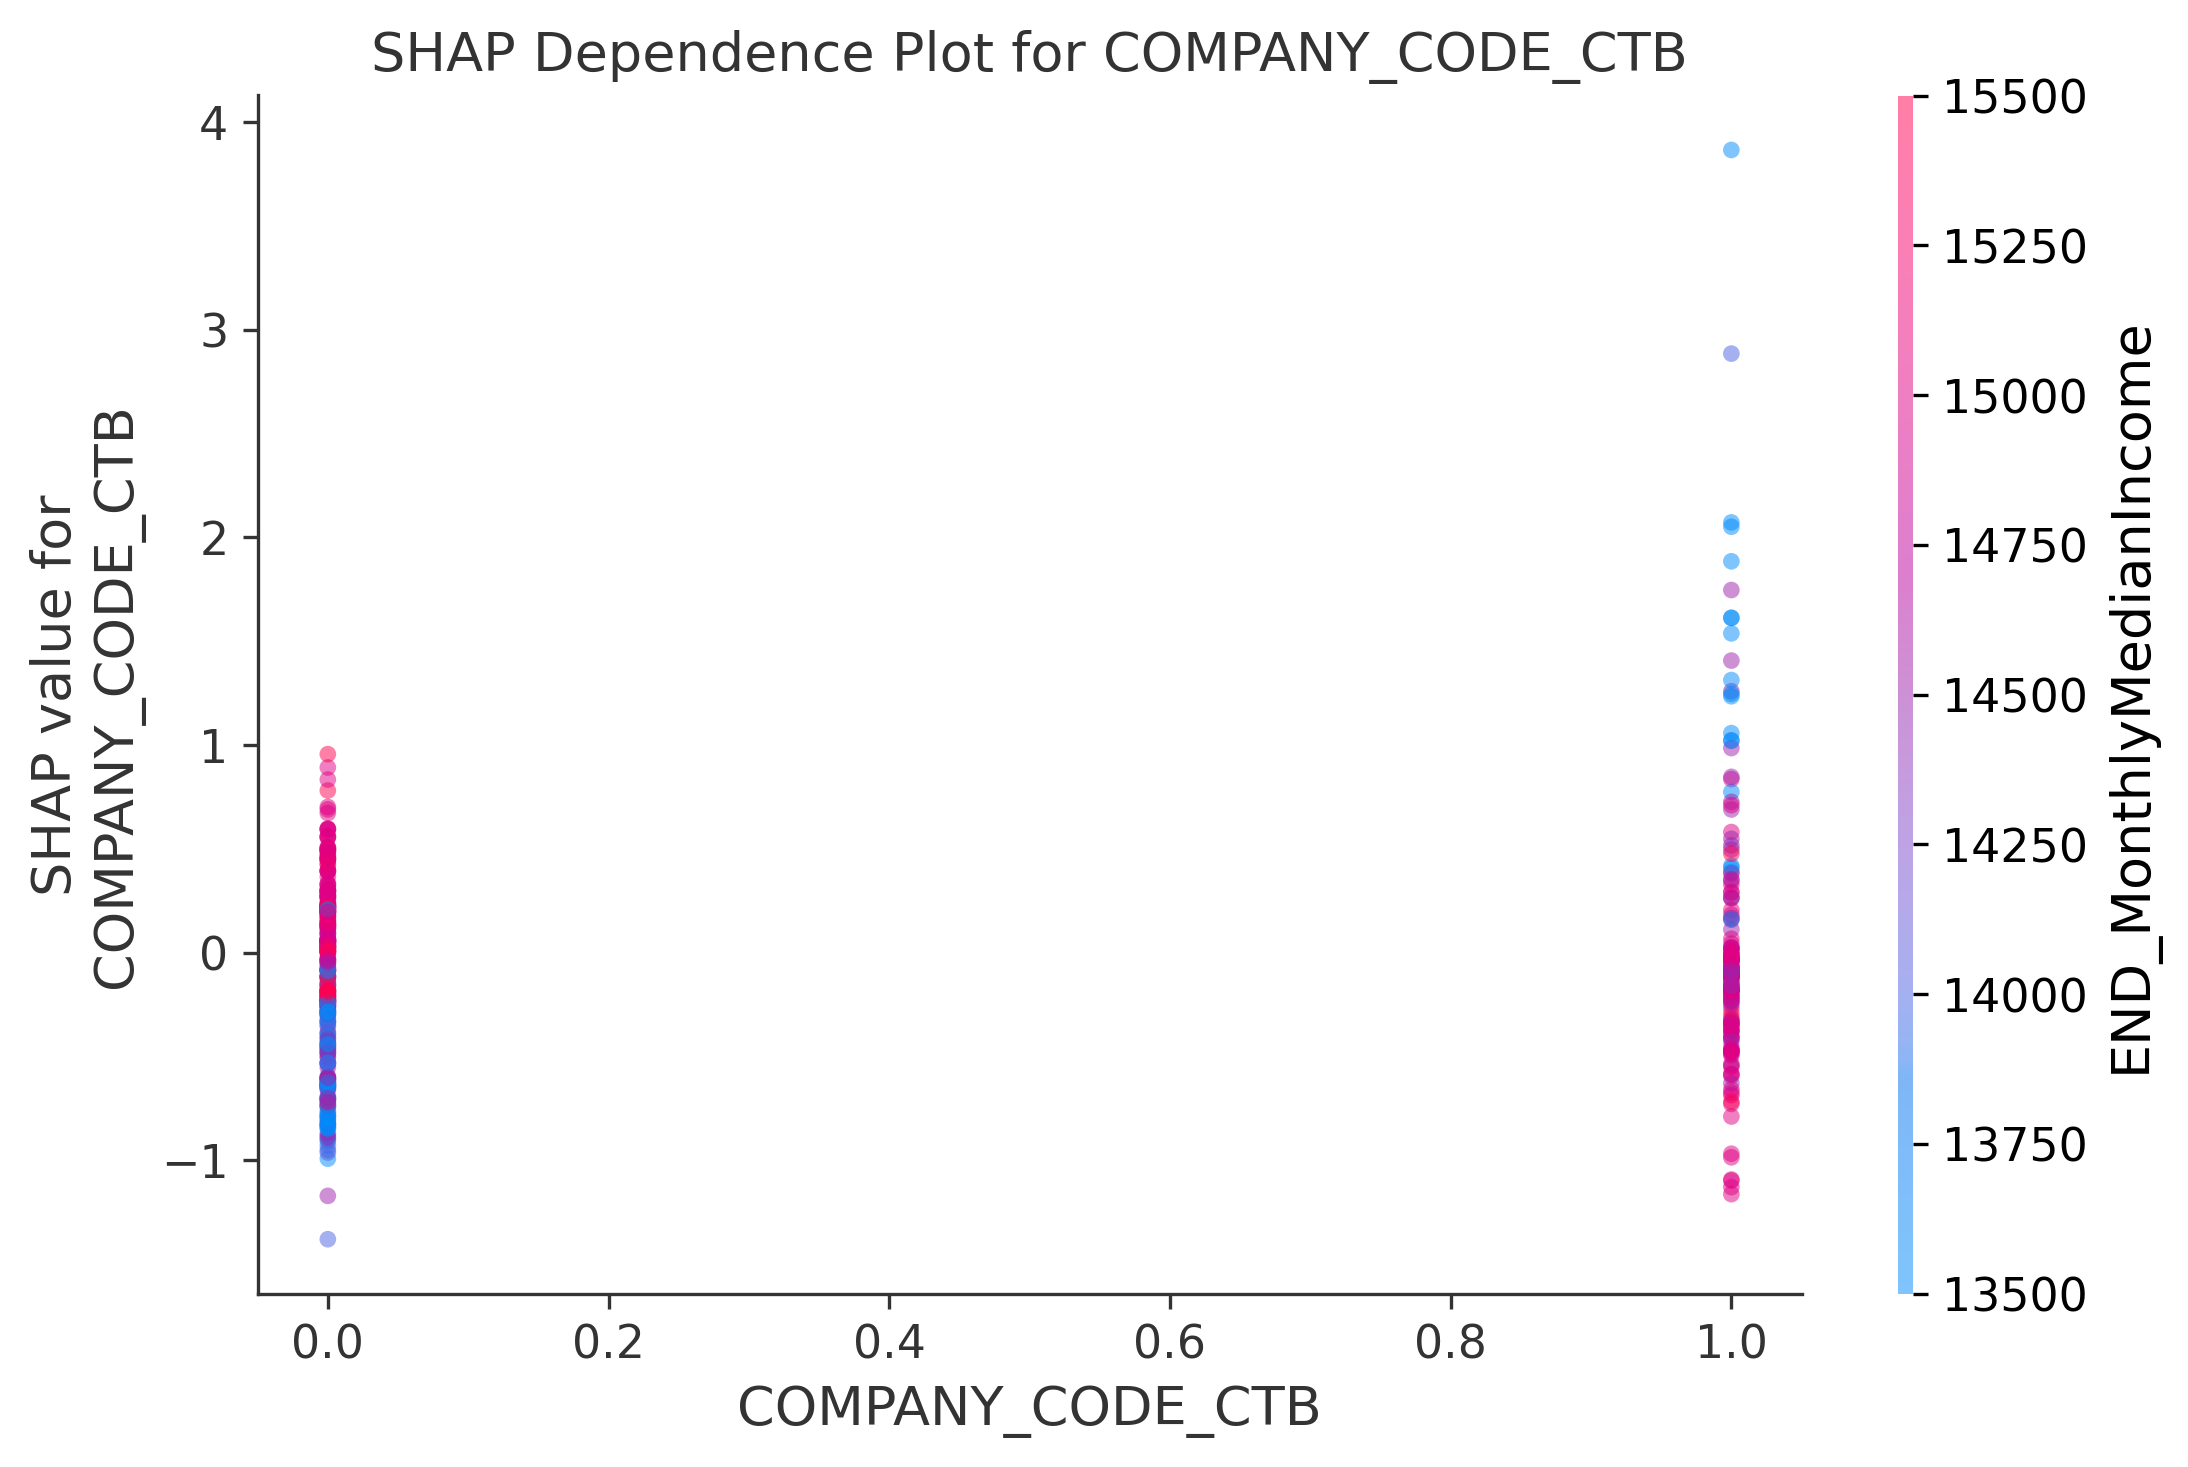

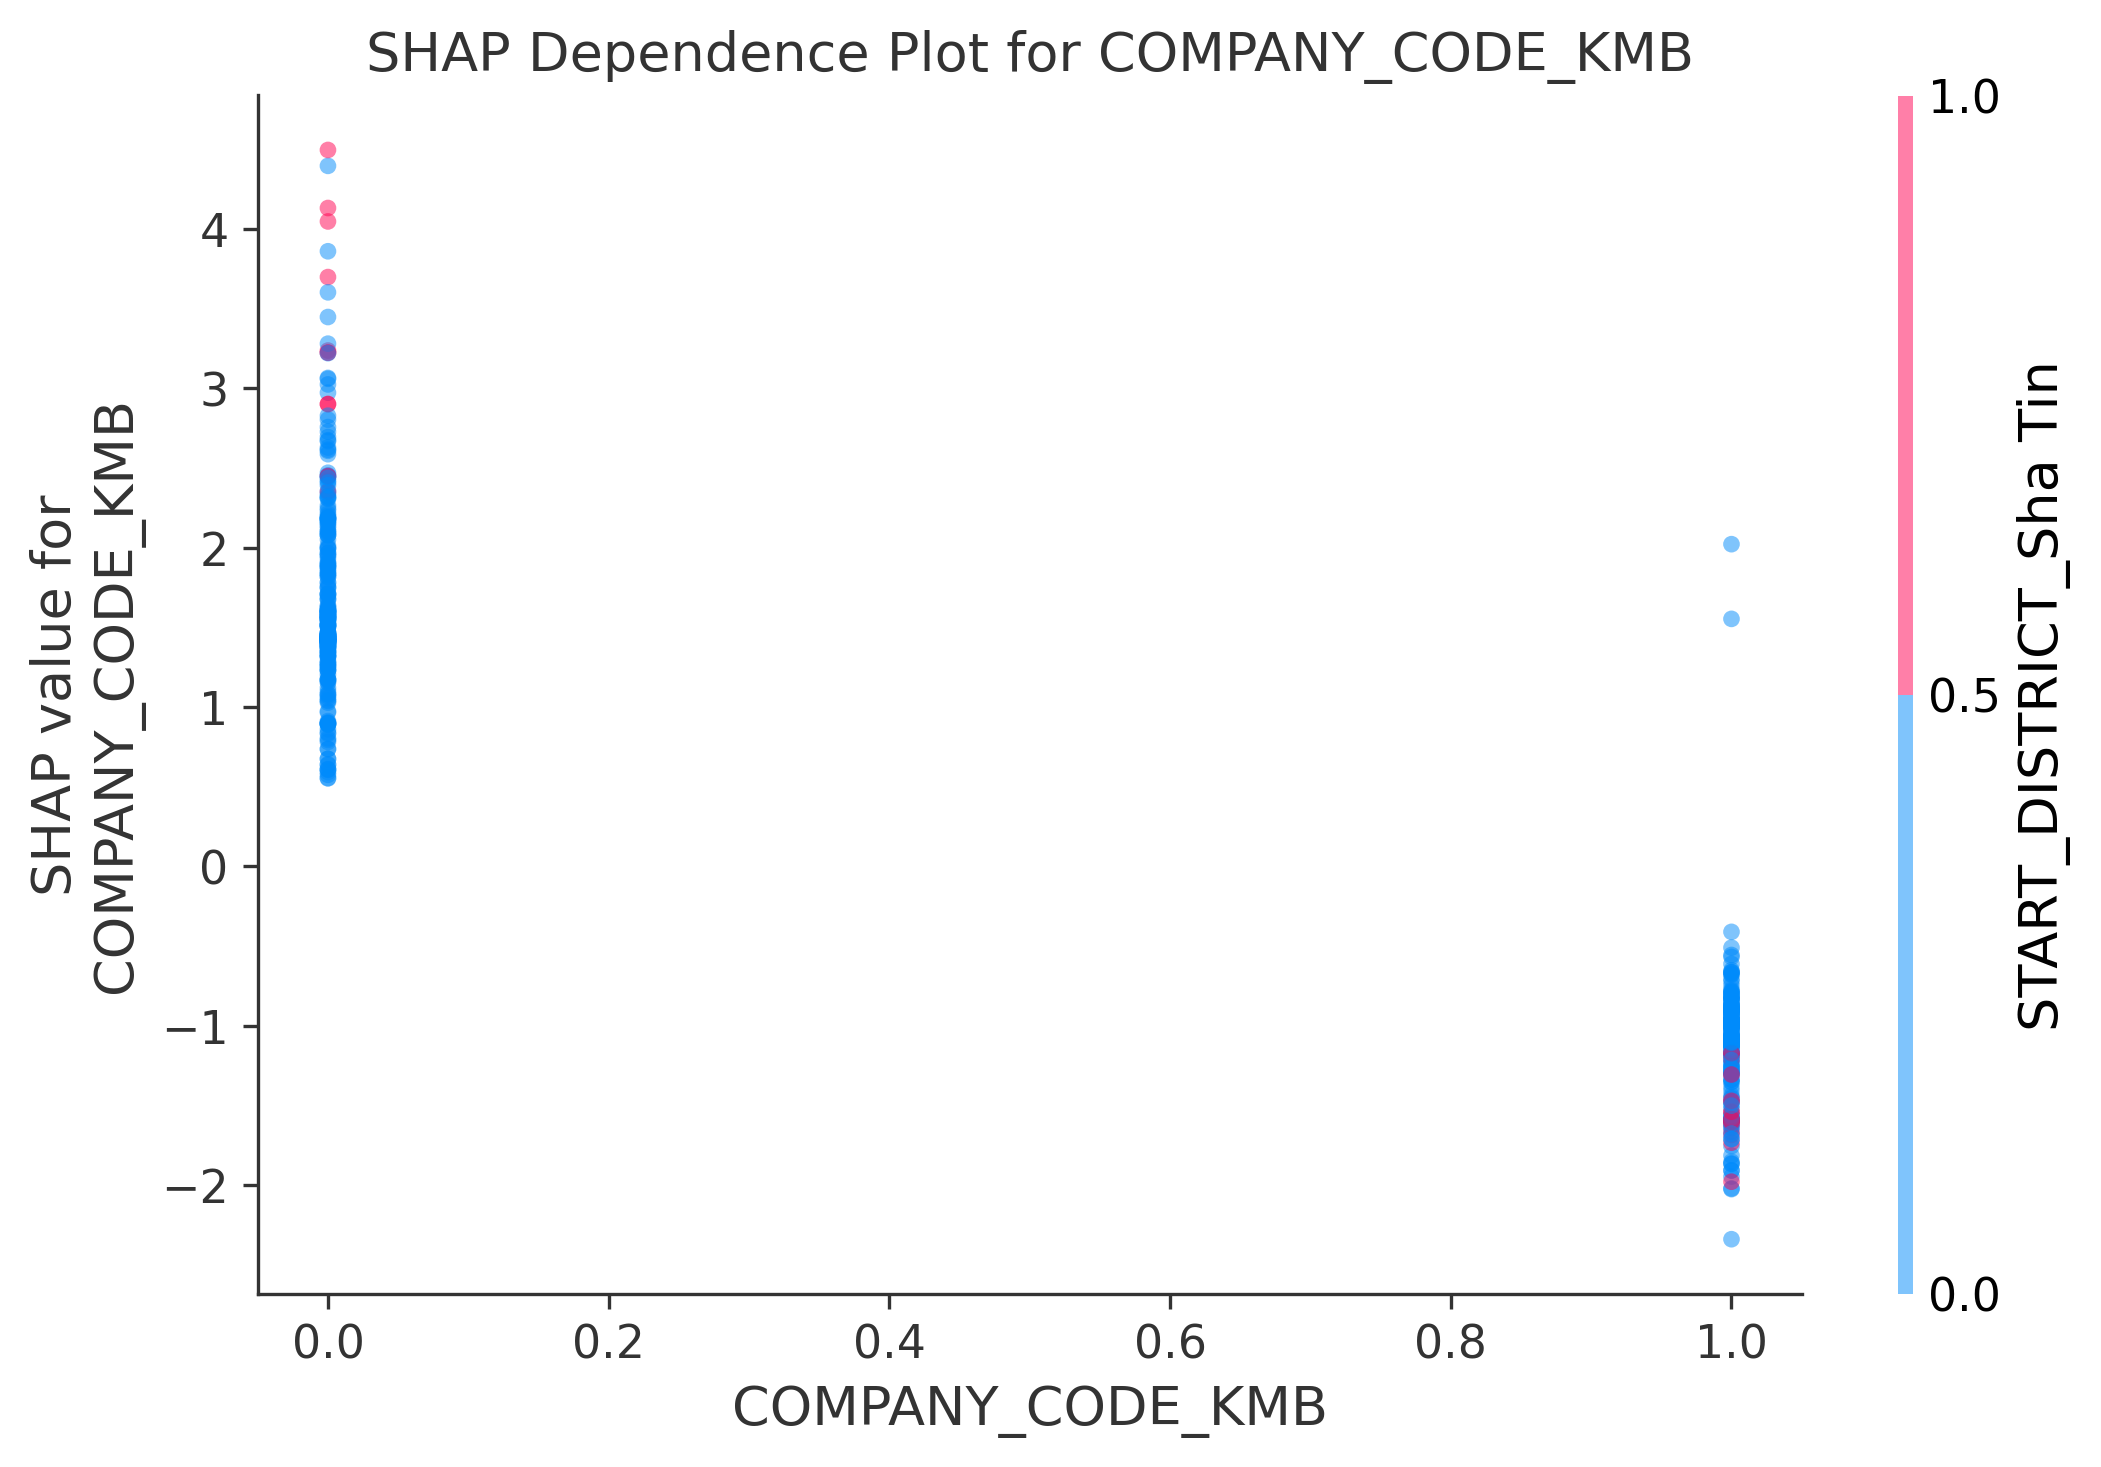

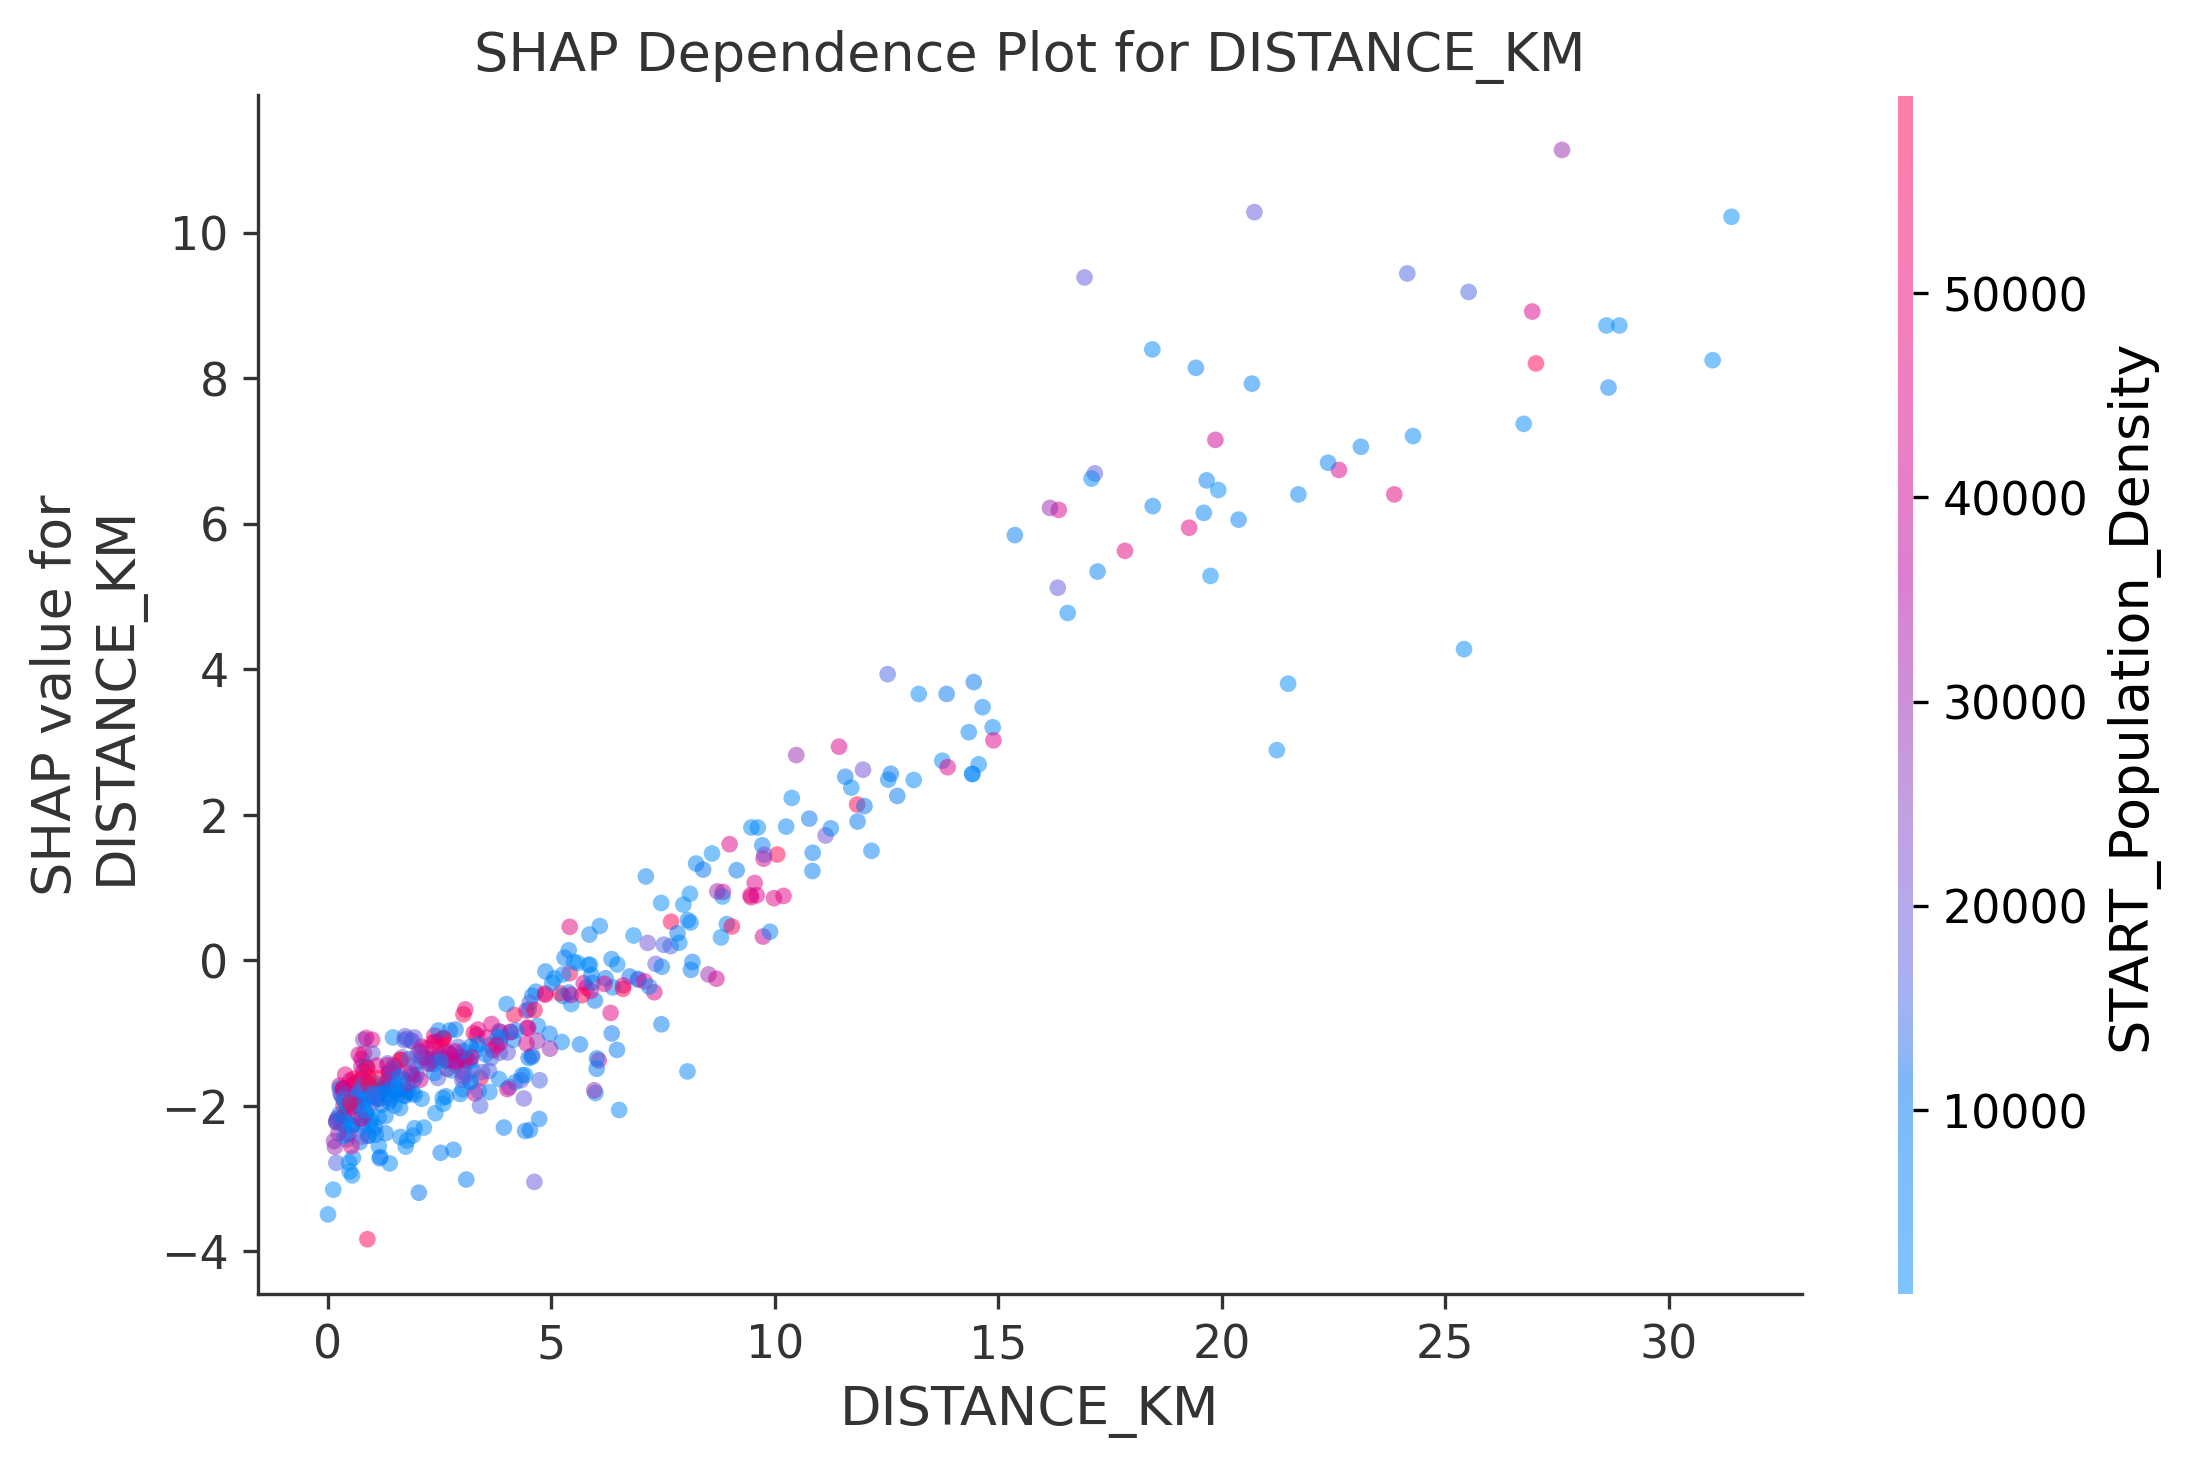


### === SPEARMAN RANK CORRELATIONS WITH PRICE ===
| Feature                           | ρ Value      | p Value   |
|-----------------------------------|--------------|-----------|
| DISTANCE_KM                       | 0.5060 (p = 0.0000) |
| START_MonthlyMedianIncome         | 0.0572 (p = 0.0000) |
| END_MonthlyMedianIncome           | 0.0505 (p = 0.0000) |
| START_Bus_Station_Density         | -0.0432 (p = 0.0000) |
| START_Population_Density          | -0.0416 (p = 0.0000) |
| BUS_DENSITY_DIFF                  | -0.0305 (p = 0.0000) |
| END_Population_Density            | -0.0257 (p = 0.0000) |
| FLOW_RATIO                         | 0.0218 (p = 0.0000) |
| NET_FLOW                          | 0.0214 (p = 0.0000) |
| END_Bus_Station_Density           | -0.0191 (p = 0.0000) |
| START_Outflow                      | 0.0143 (p = 0.0000) |
| END_Outflow                        | -0.0111 (p = 0.0000) |
| END_Inflow                        | 0.0089 (p = 0.0000) |
| DENSITY_DIFF                      | -0.0076 (p = 0.0000) |
| INCOME_DIFF                       | 0.0006 (p = 0.5721) |
| START_Inflow                      | 0.0005 (p = 0.6660) |

### === MODEL TRAINING AND EVALUATION ===
#### 2. CatBoost Model for Identifying Influential Factors
**Note:** CatBoost provides an independent perspective on feature importance, allowing us to triangulate influential factors with greater confidence.

- **Best Parameters**: 
    - random_strength: 1
    - one_hot_max_size: 10
    - learning_rate: 0.1
    - l2_leaf_reg: 5
    - iterations: 500
    - depth: 8
    - bagging_temperature: 1

- **Model Performance**:
    - Train RMSE: 6.1642
    - Test RMSE: 6.1650
    - Train R²: 0.4710
    - Test R²: 0.4634
    - Train MAE: 3.8267
    - Test MAE: 3.8297

- **Feature Importance (Top 15)**:
    1. DISTANCE_KM: 23.641465
    2. COMPANY_CODE_KMB: 15.369479
    3. START_Outflow: 6.087068
    4. COMPANY_CODE_CTB: 5.605740
    5. START_MonthlyMedianIncome: 4.327103
    6. BUS_DENSITY_DIFF: 3.757282
    7. START_Population_Density: 3.753157
    8. END_MonthlyMedianIncome: 3.627446
    9. DENSITY_DIFF: 3.352572
    10. END_Population_Density: 3.329795
    11. END_Bus_Station_Density: 2.875489
    12. START_Inflow: 2.736919
    13. END_Outflow: 2.667461
    14. END_Inflow: 2.638592
    15. START_Bus_Station_Density: 2.037330

### === QUANTIFIED SHAP VALUES FOR TOP FEATURES ===
| Feature                          | Mean Absolute SHAP | Mean SHAP | Std SHAP  | Min SHAP | Max SHAP  |
|----------------------------------|--------------------|-----------|-----------|----------|-----------|
| DISTANCE_KM                      | 1.996840           | -0.335898 | 2.644116  | -3.834777| 11.140590 |
| COMPANY_CODE_KMB                 | 1.464685           | 0.446414  | 1.527637  | -2.339829| 4.496802  |
| BUS_DENSITY_DIFF                 | 0.423547           | 0.060789  | 0.522664  | -0.971202| 1.867776  |
| COMPANY_CODE_CTB                 | 0.378223           | -0.060315 | 0.534259  | -1.379131| 3.866181  |
| START_Population_Density         | 0.345994           | -0.058311 | 0.427989  | -1.142920| 1.786621  |
| START_Outflow                     | 0.297308           | -0.091333 | 0.370694  | -0.981001| 1.641619  |
| START_MonthlyMedianIncome        | 0.248181           | -0.058914 | 0.335860  | -0.717906| 1.892402  |
| DENSITY_DIFF                      | 0.245264           | -0.024812 | 0.350648  | -0.846104| 1.874840  |
| END_MonthlyMedianIncome          | 0.232588           | -0.071284 | 0.303987  | -0.739244| 1.996143  |
| END_Population_Density           | 0.185983           | 0.003773  | 0.261789  | -0.435636| 1.553657  |


In [ ]:
### -------- CATBOOST MODEL -------- ###

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr, ttest_ind, mannwhitneyu, permutation_test
from sklearn.model_selection import train_test_split, RandomizedSearchCV, KFold, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.inspection import PartialDependenceDisplay
from catboost import CatBoostRegressor
import shap
import warnings


# Load data
model_data = pd.read_csv(r"C:\Users\jonch\COMP3522\submission\Feature_Engineering_Dependencies\Model_data.csv")

# Define features to keep (including one-hot encoded columns)
numeric_features = [
    'PRICE', 'DISTANCE_KM', 'START_MonthlyMedianIncome', 'END_MonthlyMedianIncome',
    'START_Population_Density', 'END_Population_Density', 'START_Inflow', 'START_Outflow',
    'END_Inflow', 'END_Outflow', 'FLOW_RATIO', 'NET_FLOW', 'INCOME_DIFF', 'DENSITY_DIFF',
    'BUS_DENSITY_DIFF', 'START_Bus_Station_Density', 'END_Bus_Station_Density'
]

company_cols = [col for col in model_data.columns if col.startswith('COMPANY_CODE_')]

start_district_cols = [col for col in model_data.columns if col.startswith('START_DISTRICT_')]
end_district_cols = [col for col in model_data.columns if col.startswith('END_DISTRICT_')]

#combine all features
all_features = numeric_features + company_cols + start_district_cols + end_district_cols

#filter data
data = model_data[all_features]

#check missing vals
print("Missing values in the dataset:")
print(data.isnull().sum().sum())

#handle missing vals
if data.isnull().sum().sum() > 0:
    data = data.fillna(data.median())

# Define target variable and features
y = data['PRICE']
X = data.drop('PRICE', axis=1)

#80/20 train test splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


print("\n=== DESCRIPTIVE STATISTICS ===")
print(data[numeric_features].describe())

# Calculate correlations with target variable
print("\n=== SPEARMAN RANK CORRELATIONS WITH PRICE ===")
correlations = []
for feature in X.columns:
    if feature in numeric_features:  # Only calculate for numeric features
        corr, p = spearmanr(X[feature], y, nan_policy='omit')
        correlations.append((feature, corr, p))

# Sort by absolute correlation
correlations.sort(key=lambda x: abs(x[1]), reverse=True)

# Print correlations
for feature, corr, p in correlations:
    print(f"{feature:>30}: ρ = {corr:.4f} (p = {p:.4f})")

# Create correlation matrix visualization
plt.figure(figsize=(12, 10))
corr_matrix = data[numeric_features].corr(method='spearman')
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt=".2f", cmap='coolwarm',
            square=True, linewidths=.5, cbar_kws={"shrink": .7})
plt.title('Spearman Correlation Matrix', fontsize=16)
plt.tight_layout()
plt.savefig('correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.close()



print("\n=== MODEL TRAINING AND EVALUATION ===")


#hyperparameter grid
cat_param_grid = {
    'iterations': [100, 200, 500],
    'learning_rate': [0.03, 0.05, 0.1],
    'depth': [4, 6, 8],
    'l2_leaf_reg': [3, 5, 7],
    'bagging_temperature': [0, 1],
    'random_strength': [1],
    'one_hot_max_size': [10]
}

#base model
cat_base = CatBoostRegressor(
    loss_function='RMSE',
    eval_metric='RMSE',
    random_seed=42,
    verbose=0
)

# Hyperparameter tuning 
cat_random = RandomizedSearchCV(
    estimator=cat_base,
    param_distributions=cat_param_grid,
    n_iter=20,
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1,
    scoring='neg_mean_squared_error'
)

# Train the model
cat_random.fit(X_train, y_train)

# Get the best model
cat_best = cat_random.best_estimator_

# Evaluate the model
cat_train_preds = cat_best.predict(X_train)
cat_test_preds = cat_best.predict(X_test)

print("\nCatBoost Best Parameters:")
print(cat_random.best_params_)

print("\nCatBoost Model Information:")
print(f"Train RMSE: {np.sqrt(mean_squared_error(y_train, cat_train_preds)):.4f}")
print(f"Test RMSE: {np.sqrt(mean_squared_error(y_test, cat_test_preds)):.4f}")
print(f"Train R²: {r2_score(y_train, cat_train_preds):.4f}")
print(f"Test R²: {r2_score(y_test, cat_test_preds):.4f}")
print(f"Train MAE: {mean_absolute_error(y_train, cat_train_preds):.4f}")
print(f"Test MAE: {mean_absolute_error(y_test, cat_test_preds):.4f}")

# Feature importance analysis
cat_feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': cat_best.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nCatBoost Feature Importance (Top 15):")
print(cat_feature_importance.head(15))

# Visualize feature importance
plt.figure(figsize=(12, 8))
top_n = 15
top_features = cat_feature_importance.head(top_n)
sns.barplot(x='Importance', y='Feature', data=top_features)
plt.title('Top 15 Features by CatBoost Importance', fontsize=16)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.tight_layout()
plt.savefig('catboost_feature_importance.png', dpi=300, bbox_inches='tight')
plt.close()

# ----------------- SHAP ANALYSIS -----------------
print("\nCalculating SHAP values for CatBoost model...")
print("Note: Using SHAP analysis to understand the directional effects of features on the target variable.")

X_shap = X_test.iloc[:2000]  

explainer_cat = shap.TreeExplainer(cat_best)
shap_values_cat = explainer_cat.shap_values(X_shap)

# SHAP summary plot
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values_cat, X_shap, plot_type="bar", show=False)
plt.title('Factors Influencing Bus Fares (SHAP Analysis - CatBoost)', fontsize=16)
plt.tight_layout()
plt.savefig('catboost_shap_importance.png', dpi=300, bbox_inches='tight')
plt.close()

# SHAP summary plot 
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values_cat, X_shap, show=False, max_display=15)
plt.title('How Factors Influence Bus Fares (Direction & Magnitude of Effects)\n(Note: Shows marginal predictions, not causal relationships)', fontsize=14)
plt.tight_layout()
plt.savefig('catboost_shap_summary.png', dpi=300, bbox_inches='tight')
plt.close()

# Quantify SHAP values for top features
print("\n=== QUANTIFIED SHAP VALUES FOR TOP FEATURES ===")
top_features_list = cat_feature_importance['Feature'].head(10).tolist()

shap_df = pd.DataFrame()
for feature in top_features_list:
    if feature in X_shap.columns:
        feature_idx = list(X_shap.columns).index(feature)
        shap_df[feature] = shap_values_cat[:, feature_idx]

#statistics for shap values
shap_stats = pd.DataFrame({
    'Mean Absolute SHAP': shap_df.abs().mean(),
    'Mean SHAP': shap_df.mean(),
    'Std SHAP': shap_df.std(),
    'Min SHAP': shap_df.min(),
    'Max SHAP': shap_df.max()
}).sort_values('Mean Absolute SHAP', ascending=False)

print(shap_stats)

# Save SHAP statistics to CSV
shap_stats.to_csv('shap_statistics.csv')

# Individual SHAP dependence plots for top 5 features
print("\nCreating SHAP dependence plots for top features...")
top_5_features = top_features_list[:5]
for feature in top_5_features:
    if feature in X_shap.columns:
        plt.figure(figsize=(10, 6))
        feature_idx = list(X_shap.columns).index(feature)
        shap.dependence_plot(
            feature_idx,
            shap_values_cat,
            X_shap,
            show=False,
            title=f"SHAP Dependence Plot for {feature}",
            alpha=0.5  # Add some transparency to match the style
        )
        plt.tight_layout()
        plt.savefig(f'shap_dependence_{feature}.png', dpi=300, bbox_inches='tight')
        plt.close()

# ----------------- PARTIAL DEPENDENCE PLOTS -----------------
# Filter only numeric features from top features
numeric_top_features = [f for f in top_features_list if f in numeric_features and f != 'PRICE']
numeric_top_features = numeric_top_features[:5]  # Take top 5 numeric features

# Create partial dependence plots
fig, ax = plt.subplots(figsize=(14, 10))
display = PartialDependenceDisplay.from_estimator(
    cat_best,
    X_train,
    features=numeric_top_features,
    kind="both",  # Show both the average and individual partial dependence
    n_jobs=-1,
    grid_resolution=50,
    random_state=42,
    ax=ax
)
plt.suptitle('Partial Dependence Plots for Top Features', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig('partial_dependence_plots.png', dpi=300, bbox_inches='tight')
plt.close()

# Create individual PDPs for clearer visualization
for feature in numeric_top_features:
    fig, ax = plt.subplots(figsize=(8, 6))
    display = PartialDependenceDisplay.from_estimator(
        cat_best,
        X_train,
        features=[feature],
        kind="both",
        grid_resolution=50,
        random_state=42,
        ax=ax
    )
    plt.suptitle(f'Partial Dependence Plot for {feature}', fontsize=14)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.savefig(f'pdp_{feature}.png', dpi=300, bbox_inches='tight')
    plt.close()

# ----------------- STATISTICAL VALIDATION OF FEATURE IMPORTANCE -----------------
print("\n=== STATISTICAL VALIDATION OF FEATURE IMPORTANCE ===")

# 1. Cross-validation feature importance stability
print("\n1. Cross-validation Feature Importance Stability")
n_folds = 5
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)
importance_cv = []

for train_idx, val_idx in kf.split(X):
    X_train_cv, X_val_cv = X.iloc[train_idx], X.iloc[val_idx]
    y_train_cv, y_val_cv = y.iloc[train_idx], y.iloc[val_idx]

    # Train CatBoost model on this fold
    cat_model_cv = CatBoostRegressor(
        iterations=cat_random.best_params_['iterations'],
        learning_rate=cat_random.best_params_['learning_rate'],
        depth=cat_random.best_params_['depth'],
        l2_leaf_reg=cat_random.best_params_['l2_leaf_reg'],
        random_seed=42,
        verbose=0
    )
    cat_model_cv.fit(X_train_cv, y_train_cv)

    # Get feature importance
    fold_importance = pd.DataFrame({
        'Feature': X.columns,
        'Importance': cat_model_cv.feature_importances_
    })
    importance_cv.append(fold_importance)

# Calculate mean and standard deviation of feature importance across folds
importance_cv_df = pd.concat(importance_cv)
importance_stats = importance_cv_df.groupby('Feature').agg(['mean', 'std']).reset_index()
importance_stats.columns = ['Feature', 'Mean_Importance', 'Std_Importance']
importance_stats['CV'] = importance_stats['Std_Importance'] / importance_stats['Mean_Importance']  # Coefficient of variation
importance_stats = importance_stats.sort_values('Mean_Importance', ascending=False).reset_index(drop=True)

print("Feature importance stability across CV folds (top 10):")
print(importance_stats.head(10))

# Visualize feature importance stability
plt.figure(figsize=(12, 8))
top_10_cv = importance_stats.head(10)
x = np.arange(len(top_10_cv))
width = 0.35
plt.bar(x, top_10_cv['Mean_Importance'], width, yerr=top_10_cv['Std_Importance'],
        align='center', alpha=0.7, ecolor='black', capsize=10)
plt.xticks(x, top_10_cv['Feature'], rotation=45, ha='right')
plt.ylabel('Mean Feature Importance')
plt.xlabel('Features')
plt.title('Feature Importance Stability Across CV Folds (Top 10)')
plt.tight_layout()
plt.savefig('feature_importance_stability.png', dpi=300, bbox_inches='tight')
plt.close()

print("\n2. Permutation Feature Importance")

def compute_permutation_importance(model, X, y, feature, n_repeats=5):
    baseline_score = mean_squared_error(y, model.predict(X))
    scores = []

    for _ in range(n_repeats):
        X_permuted = X.copy()
        X_permuted[feature] = np.random.permutation(X_permuted[feature].values)
        permuted_score = mean_squared_error(y, model.predict(X_permuted))
        importance = permuted_score - baseline_score
        scores.append(importance)

    return np.mean(scores), np.std(scores)

# permutation importance for top 15 features
permutation_results = []
print("Computing permutation importance for top 15 features...")
for feature in cat_feature_importance['Feature'].head(15):
    imp_mean, imp_std = compute_permutation_importance(cat_best, X_test, y_test, feature)
    permutation_results.append({
        'Feature': feature,
        'Permutation_Importance': imp_mean,
        'Std_Dev': imp_std
    })

permutation_df = pd.DataFrame(permutation_results)
permutation_df = permutation_df.sort_values('Permutation_Importance', ascending=False).reset_index(drop=True)

print("Permutation importance results:")
print(permutation_df)

# Visualize permutation importance
plt.figure(figsize=(12, 8))
plt.bar(permutation_df['Feature'], permutation_df['Permutation_Importance'],
        yerr=permutation_df['Std_Dev'], capsize=5)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Increase in MSE when Feature is Permuted')
plt.xlabel('Features')
plt.title('Permutation Feature Importance')
plt.tight_layout()
plt.savefig('permutation_importance.png', dpi=300, bbox_inches='tight')
plt.close()

# 3. Feature impact by segmentation
print("\n3. Feature Impact by Data Segmentation")

def evaluate_feature_impact(feature, X, y, model):
    """Evaluate feature impact by dividing data into segments."""
    if len(X[feature].unique()) <= 5:  # If categorical or few unique values
        segments = X[feature].unique()
        results = []

        for segment in segments:
            segment_idx = X[feature] == segment
            if sum(segment_idx) > 10:  # Ensure enough samples
                y_true = y[segment_idx]
                y_pred = model.predict(X[segment_idx])
                mse = mean_squared_error(y_true, y_pred)
                mae = mean_absolute_error(y_true, y_pred)
                results.append({
                    'Segment': segment,
                    'Count': sum(segment_idx),
                    'MSE': mse,
                    'MAE': mae
                })

        return pd.DataFrame(results)

    else:  # If continuous feature
        # Create quintiles
        quintiles = pd.qcut(X[feature], 5, labels=False, duplicates='drop')
        results = []

        for q in range(max(quintiles) + 1):
            segment_idx = quintiles == q
            if sum(segment_idx) > 10:  # Ensure enough samples
                y_true = y[segment_idx]
                y_pred = model.predict(X[segment_idx])
                mse = mean_squared_error(y_true, y_pred)
                mae = mean_absolute_error(y_true, y_pred)

                # Get range values for this quintile
                min_val = X.loc[segment_idx, feature].min()
                max_val = X.loc[segment_idx, feature].max()

                results.append({
                    'Quintile': q,
                    'Range': f"{min_val:.2f} - {max_val:.2f}",
                    'Count': sum(segment_idx),
                    'MSE': mse,
                    'MAE': mae
                })

        return pd.DataFrame(results)

# Analyze top 5 numeric features by segmentation
print("Analyzing error distribution across segments for top numeric features...")
top_numeric_features = [f for f in cat_feature_importance['Feature'] if f in numeric_features][:5]

for feature in top_numeric_features:
    impact_df = evaluate_feature_impact(feature, X_test, y_test, cat_best)
    print(f"\nError distribution across segments for {feature}:")
    print(impact_df)

    # Visualize error by segment
    plt.figure(figsize=(10, 6))
    if 'Quintile' in impact_df.columns:
        plt.bar(impact_df['Range'], impact_df['MAE'])
        plt.xlabel(f"{feature} Range")
    else:
        plt.bar(impact_df['Segment'], impact_df['MAE'])
        plt.xlabel(f"{feature} Value")

    plt.ylabel('Mean Absolute Error')
    plt.title(f'Error Distribution by {feature} Segments')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.savefig(f'error_by_segment_{feature}.png', dpi=300, bbox_inches='tight')
    plt.close()

# 4. Statistical significance of feature impacts using bootstrap
print("\n4. Bootstrap Analysis for Statistical Significance of Feature Importance")

def bootstrap_feature_importance(model, X, y, n_iterations=100):
    """Bootstrap analysis of feature importance."""
    n_samples = len(X)
    importance_bootstrap = []

    for _ in range(n_iterations):
        # Bootstrap sample indices
        indices = np.random.choice(range(n_samples), n_samples, replace=True)
        X_boot = X.iloc[indices]
        y_boot = y.iloc[indices]

        # Train model on bootstrap sample
        boot_model = CatBoostRegressor(
            iterations=cat_random.best_params_['iterations'],
            learning_rate=cat_random.best_params_['learning_rate'],
            depth=cat_random.best_params_['depth'],
            l2_leaf_reg=cat_random.best_params_['l2_leaf_reg'],
            random_seed=42,
            verbose=0
        )
        boot_model.fit(X_boot, y_boot)

        # Get feature importance
        boot_importance = pd.DataFrame({
            'Feature': X.columns,
            'Importance': boot_model.feature_importances_
        })
        importance_bootstrap.append(boot_importance)

    # Combine all bootstrap results
    all_bootstrap = pd.concat(importance_bootstrap)

    # Calculate confidence intervals
    bootstrap_stats = all_bootstrap.groupby('Feature').agg({
        'Importance': [
            'mean',
            'std',
            lambda x: np.percentile(x, 2.5),  # 2.5th percentile for 95% CI
            lambda x: np.percentile(x, 97.5)   # 97.5th percentile for 95% CI
        ]
    }).reset_index()

    bootstrap_stats.columns = ['Feature', 'Mean_Importance', 'Std_Importance', 'CI_Lower', 'CI_Upper']
    bootstrap_stats['Significant'] = bootstrap_stats['CI_Lower'] > 0  # If lower CI > 0, feature is significant

    return bootstrap_stats.sort_values('Mean_Importance', ascending=False)

# Run bootstrap analysis
print("Running bootstrap analysis for statistical significance of feature importance...")
bootstrap_results = bootstrap_feature_importance(cat_best, X_train, y_train, n_iterations=100)
print("Bootstrap results (top 15):")
print(bootstrap_results.head(15))

# Visualize bootstrap results with confidence intervals
plt.figure(figsize=(14, 10))
top_15_bootstrap = bootstrap_results.head(15)
x = np.arange(len(top_15_bootstrap))
width = 0.35

plt.bar(x, top_15_bootstrap['Mean_Importance'], width,
        yerr=[top_15_bootstrap['Mean_Importance'] - top_15_bootstrap['CI_Lower'],
              top_15_bootstrap['CI_Upper'] - top_15_bootstrap['Mean_Importance']],
        align='center', alpha=0.7, ecolor='black', capsize=5)

plt.xticks(x, top_15_bootstrap['Feature'], rotation=45, ha='right')
plt.ylabel('Feature Importance (95% CI)')
plt.xlabel('Features')
plt.title('Feature Importance with 95% Confidence Intervals (Bootstrap)')
plt.tight_layout()
plt.savefig('bootstrap_feature_importance.png', dpi=300, bbox_inches='tight')
plt.close()

# Count significant features
significant_features = bootstrap_results[bootstrap_results['Significant']].shape[0]
print(f"\nNumber of statistically significant features: {significant_features} out of {len(bootstrap_results)}")

# 5. Feature Importance vs Correlation Comparison
print("\n5. Feature Importance vs Correlation Comparison")

# Calculate correlations with target for all features
feature_correlations = {}
for feature in X.columns:
    if feature in numeric_features:  # Only numeric features have meaningful correlations
        corr, p = spearmanr(X[feature], y, nan_policy='omit')
        feature_correlations[feature] = corr

# Combine different importance metrics
importance_comparison = pd.merge(
    cat_feature_importance[['Feature', 'Importance']].rename(columns={'Importance': 'CatBoost_Importance'}),
    permutation_df[['Feature', 'Permutation_Importance']],
    on='Feature',
    how='inner'
)

# Add SHAP importance
shap_importance = pd.DataFrame({
    'Feature': shap_stats.index,
    'SHAP_Importance': shap_stats['Mean Absolute SHAP']
}).reset_index(drop=True)

importance_comparison = pd.merge(
    importance_comparison,
    shap_importance,
    on='Feature',
    how='inner'
)

# Add Spearman correlation
importance_comparison['Spearman_ρ'] = importance_comparison['Feature'].map(
    lambda x: feature_correlations.get(x, float('nan'))
)

# Calculate correlations between importance metrics
numeric_cols = [col for col in importance_comparison.columns if col != 'Feature']
corr_matrix = importance_comparison[numeric_cols].corr()
print("Correlation between importance metrics:")
print(corr_matrix)

# Visualize correlation between importance metrics
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Between Different Feature Importance Metrics')
plt.tight_layout()
plt.savefig('importance_metrics_correlation.png', dpi=300, bbox_inches='tight')
plt.close()

# Feature Importance vs Correlation Comparison table
importance_corr_comparison = importance_comparison[['Feature', 'CatBoost_Importance', 'Spearman_ρ']].copy()
importance_corr_comparison = importance_corr_comparison.sort_values('CatBoost_Importance', ascending=False)
print("\n=== FEATURE IMPORTANCE vs CORRELATION ===")
print(importance_corr_comparison)

# Visualize Feature Importance vs Correlation
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=importance_comparison,
    x='Spearman_ρ',
    y='CatBoost_Importance',
    size='SHAP_Importance',
    hue='SHAP_Importance',
    palette='viridis',
    alpha=0.7
)

for i, row in importance_comparison.iterrows():
    if abs(row['Spearman_ρ']) > 0.1 or row['CatBoost_Importance'] > 0.02:
        plt.text(row['Spearman_ρ'], row['CatBoost_Importance'], row['Feature'], fontsize=9)

plt.title('Feature Importance vs Correlation')
plt.xlabel('Spearman Correlation with Price')
plt.ylabel('CatBoost Importance')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('importance_vs_correlation.png', dpi=300, bbox_inches='tight')
plt.close()

# Scatter plots comparing different importance metrics
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(importance_comparison['CatBoost_Importance'],
            importance_comparison['Permutation_Importance'])
plt.xlabel('CatBoost Importance')
plt.ylabel('Permutation Importance')
plt.title('CatBoost vs. Permutation')

plt.subplot(1, 3, 2)
plt.scatter(importance_comparison['CatBoost_Importance'],
            importance_comparison['SHAP_Importance'])
plt.xlabel('CatBoost Importance')
plt.ylabel('SHAP Importance')
plt.title('CatBoost vs. SHAP')

plt.subplot(1, 3, 3)
plt.scatter(importance_comparison['Permutation_Importance'],
            importance_comparison['SHAP_Importance'])
plt.xlabel('Permutation Importance')
plt.ylabel('SHAP Importance')
plt.title('Permutation vs. SHAP')

plt.tight_layout()
plt.savefig('importance_metrics_comparison.png', dpi=300, bbox_inches='tight')
plt.close()

# 6. Feature drop importance - evaluate model performance when dropping important features
print("\n6. Feature Drop Importance")

def evaluate_with_dropped_feature(X_train, y_train, X_test, y_test, feature, best_params):
    """Train model without a specific feature and evaluate performance."""
    X_train_dropped = X_train.drop(feature, axis=1)
    X_test_dropped = X_test.drop(feature, axis=1)

    # Train model without this feature
    drop_model = CatBoostRegressor(
        iterations=best_params['iterations'],
        learning_rate=best_params['learning_rate'],
        depth=best_params['depth'],
        l2_leaf_reg=best_params['l2_leaf_reg'],
        random_seed=42,
        verbose=0
    )
    drop_model.fit(X_train_dropped, y_train)

    # Evaluate model
    y_pred = drop_model.predict(X_test_dropped)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    return rmse, r2, mae

# Get baseline metrics
baseline_rmse = np.sqrt(mean_squared_error(y_test, cat_test_preds))
baseline_r2 = r2_score(y_test, cat_test_preds)
baseline_mae = mean_absolute_error(y_test, cat_test_preds)

print(f"Baseline model metrics - RMSE: {baseline_rmse:.4f}, R²: {baseline_r2:.4f}, MAE: {baseline_mae:.4f}")

# Evaluate drop importance for top 10 features
drop_results = []
for feature in cat_feature_importance['Feature'].head(10):
    rmse, r2, mae = evaluate_with_dropped_feature(
        X_train, y_train, X_test, y_test, feature, cat_random.best_params_
    )

    # Calculate performance change
    rmse_change = ((rmse - baseline_rmse) / baseline_rmse) * 100
    r2_change = ((baseline_r2 - r2) / baseline_r2) * 100 if baseline_r2 > 0 else -((baseline_r2 - r2) / baseline_r2) * 100
    mae_change = ((mae - baseline_mae) / baseline_mae) * 100

    drop_results.append({
        'Feature': feature,
        'RMSE': rmse,
        'R2': r2,
        'MAE': mae,
        'RMSE_Change_%': rmse_change,
        'R2_Change_%': r2_change,
        'MAE_Change_%': mae_change
    })


In [ ]:
"C:\Users\jonch\COMP3522\submission\Feature_Engineering_Dependencies\RF Figures\rf_shap_dependence_BUS_DENSITY_DIFF.png"
"C:\Users\jonch\COMP3522\submission\Feature_Engineering_Dependencies\RF Figures\rf_shap_dependence_DISTANCE_KM.png"
"C:\Users\jonch\COMP3522\submission\Feature_Engineering_Dependencies\RF Figures\rf_shap_dependence_COMPANY_CODE_KMB.png"
"C:\Users\jonch\COMP3522\submission\Feature_Engineering_Dependencies\RF Figures\rf_shap_summary.png"

In [ ]:
"C:\Users\jonch\COMP3522\submission\Feature_Engineering_Dependencies\CatBoost Figures\catboost_shap_summary.png"
"C:\Users\jonch\COMP3522\submission\Feature_Engineering_Dependencies\CatBoost Figures\shap_dependence_COMPANY_CODE_CTB.png"
"C:\Users\jonch\COMP3522\submission\Feature_Engineering_Dependencies\CatBoost Figures\shap_dependence_COMPANY_CODE_KMB.png"
"C:\Users\jonch\COMP3522\submission\Feature_Engineering_Dependencies\CatBoost Figures\shap_dependence_DISTANCE_KM.png"
